__1.Introducation__

__2.EDA__

__3.Data Preprocessing__

__4.Filling Missing Value__

__5.Building ML Classifer Models__

__6.Compare the Models Performance__

__7.Ploting Importance Features__

__8.Conclusion__


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Import the neccessary modules for data manipulation and visual representatio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
import matplotlib.gridspec as gridspec

#from plotly.offline import init_notebook_mode, iplot
#import plotly.graph_objs as go
#import plotly.plotly as py
#from plotly import tools
#from datetime import date
#import plotly.figure_factory as ff
#import random 
import warnings
import operator
warnings.filterwarnings("ignore")
#init_notebook_mode(connected=True)

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

## 1.Introducation

 This  kernal shows the EDA of household poverty prediction.

In [11]:
train_data=pd.read_csv('C:\\Users\\harsh\\Desktop\\Costa-Rican-Household-Poverty-Level-Prediction-master\\Costa-Rican-Household-Poverty-Level-Prediction-master\\train.csv')
test_data=pd.read_csv('C:\\Users\\harsh\\Desktop\\Costa-Rican-Household-Poverty-Level-Prediction-master\\Costa-Rican-Household-Poverty-Level-Prediction-master\\test.csv')

## Identifying Numerical and Categorical Features

Function for find out Numerical and categeical Variable

In [12]:
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print('-----'*40)
    print("numerical_features:",numerical_features)
    

In [13]:
type_features(train_data)

categorical_features : Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=138)


In [14]:
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


__Identifying Missing Value Present in  Train Dataset__

In [15]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,5))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],palette="spring",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    
    return ms

,Total,Percent
rez_esc,7928,82.954902
v18q1,7342,76.823271
v2a1,6860,71.779847
meaneduc,5,0.052318
SQBmeaned,5,0.052318


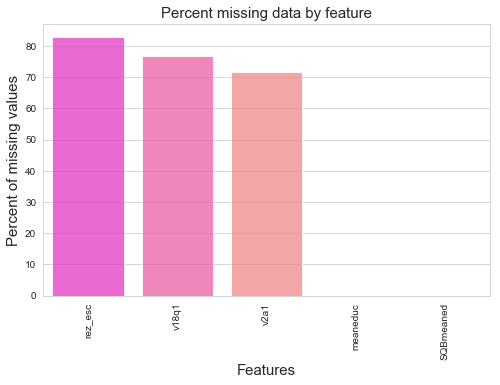

In [16]:
missingdata(train_data)

## Identifying Missing Value Present in  Test Dataset

,Total,Percent
rez_esc,19653,82.381791
v18q1,18126,75.980885
v2a1,17403,72.950201
SQBmeaned,31,0.129946
meaneduc,31,0.129946


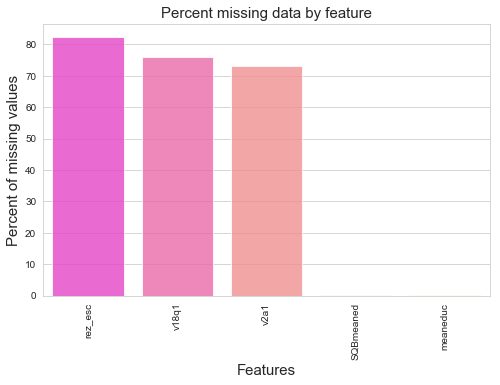

In [17]:
missingdata(test_data)

## Checking the Data Distribution  of Target Variable

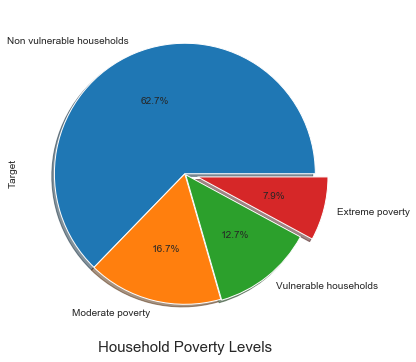

In [20]:
f,ax=plt.subplots(1,figsize=(10,6))

labels = ['Extreme poverty' ,'Moderate poverty','Vulnerable households','Non vulnerable households']
la=['Non vulnerable households','Moderate poverty','Vulnerable households','Extreme poverty'] #highoreder value need first
train_data.Target.value_counts().plot.pie(explode=[0,0.001,0.01,0.1],autopct='%1.1f%%',shadow=True,ax=ax,labels=la)
ax.set_xlabel("Household Poverty Levels", fontsize=15)

#sns.countplot('Target',data=train_data,ax=ax[1],).set_title("Household Poverty Levels", fontsize=15)
#ax[1].set_xticklabels(labels, minor=False, rotation=-90)


plt.show()

The above given household Poverty Levels distribution shows that Extreme proverty is only around 8% of the total data provided and non Vulnerable households have high count in the given data distribution.

### create new column called as target which has catergorical values as per the description

In [22]:
## create new column called as target which has catergorical values 
train_data['target'] = train_data['Target']
train_data['target']=train_data['target'].apply(str)


In [23]:
train_data['target'].apply(str)

0       4
1       4
2       4
3       4
4       4
5       4
6       4
7       4
8       4
9       4
10      4
11      4
12      4
13      4
14      4
15      4
16      4
17      4
18      4
19      4
20      4
21      4
22      4
23      4
24      4
25      4
26      4
27      4
28      4
29      4
       ..
9527    4
9528    4
9529    4
9530    4
9531    4
9532    4
9533    4
9534    3
9535    1
9536    2
9537    2
9538    2
9539    2
9540    2
9541    2
9542    2
9543    2
9544    2
9545    4
9546    4
9547    4
9548    4
9549    4
9550    2
9551    2
9552    2
9553    2
9554    2
9555    2
9556    2
Name: target, Length: 9557, dtype: object

In [24]:
train_data['target'] = train_data['target'].map({'1': 'extreme poverty' ,'2' : 'moderate poverty', 
                              '3' :'vulnerable households', '4' : 'non vulnerable households'})

In [25]:
train_data.target.value_counts()

non vulnerable households    5996
moderate poverty             1597
vulnerable households        1209
extreme poverty               755
Name: target, dtype: int64

__Checking what households own based featuers given on the householding stuff like table,refrigator,computer,tv and Mobile__

In [17]:
def plot_re(df,t1='',t2='',t3=''):
    f,ax=plt.subplots(1,2,figsize=(18,6))
    labels=['NOT Having','Having']
    sns.countplot(x=t1, data=df, palette='Set2',ax=ax[0]).set_title(t3 + ' Distribution',fontsize=15)
    ax[0].set_xlabel(t3, fontsize=15)
    ax[0].set_xticklabels(labels, minor=False,fontsize=15)
    sns.barplot(x=t1, y=t1, hue=t2, data=df, estimator=lambda x: len(x) / len(df) * 100,ax=ax[1])
    ax[1].set_title('HouseHold Proverty Levels Based On  ' + t3 +' Distribution',fontsize=15)
    ax[1].set(ylabel="Percent")
    ax[1].set_xlabel(t3, fontsize=15)
    ax[1].set_xticklabels(labels, minor=False,fontsize=15)
    a=plt.show()
    return a

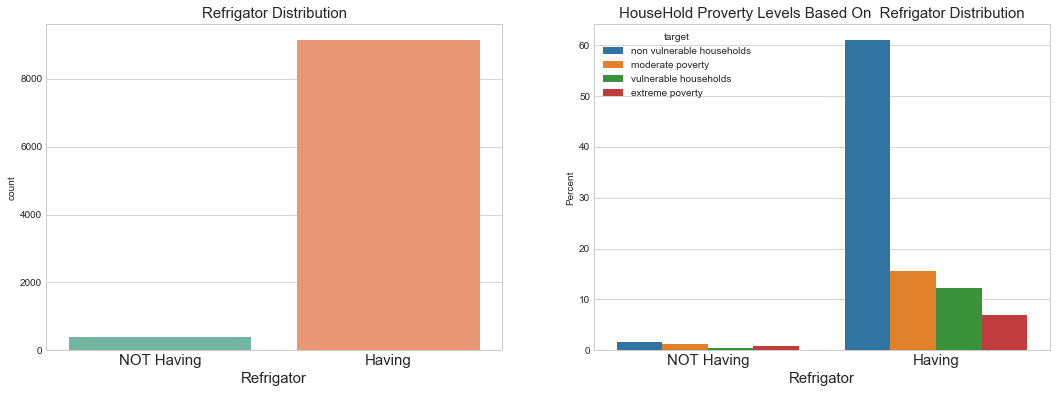

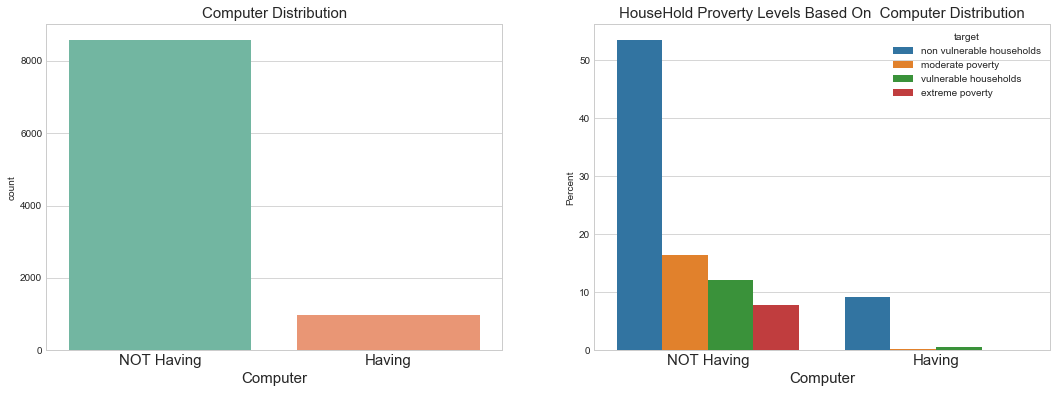

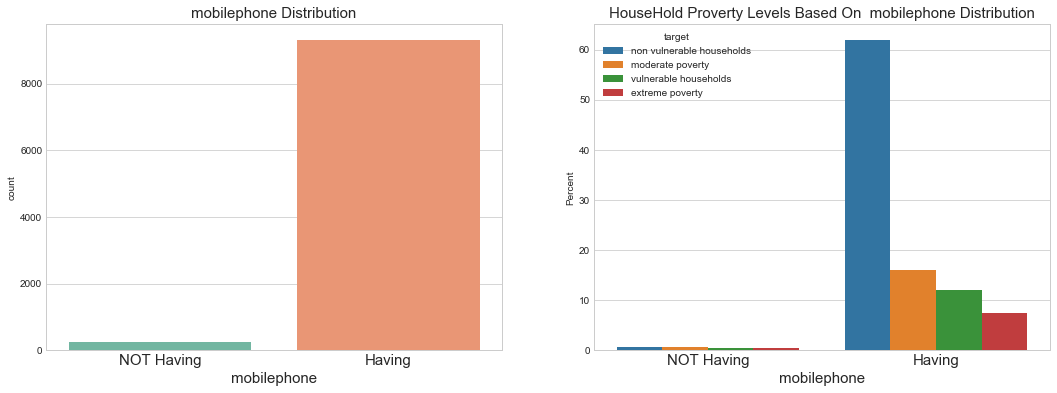

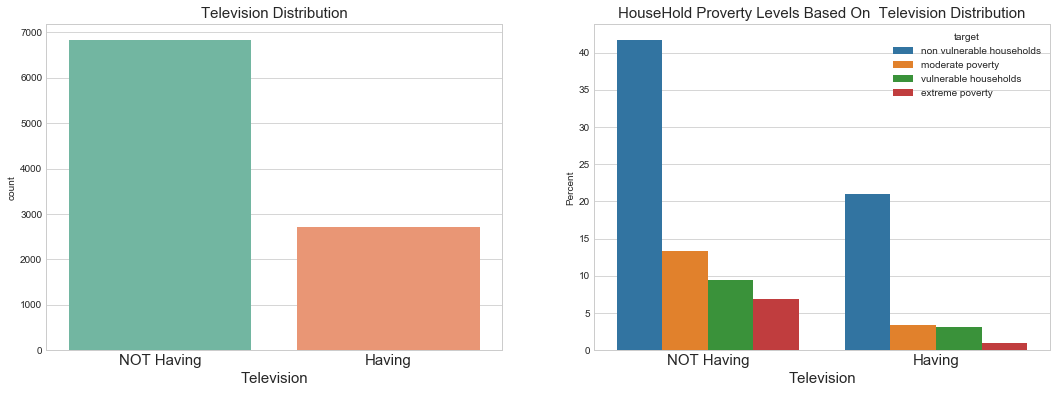

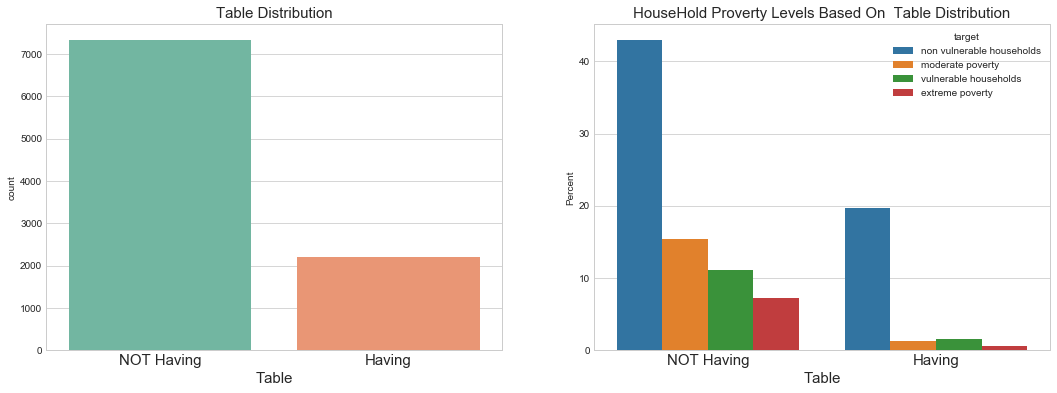

In [18]:
plot_re(train_data,'refrig','target','Refrigator')
plot_re(train_data,'computer','target','Computer')
plot_re(train_data,'mobilephone','target','mobilephone')
plot_re(train_data,'television','target','Television')
plot_re(train_data,'v18q','target','Table')

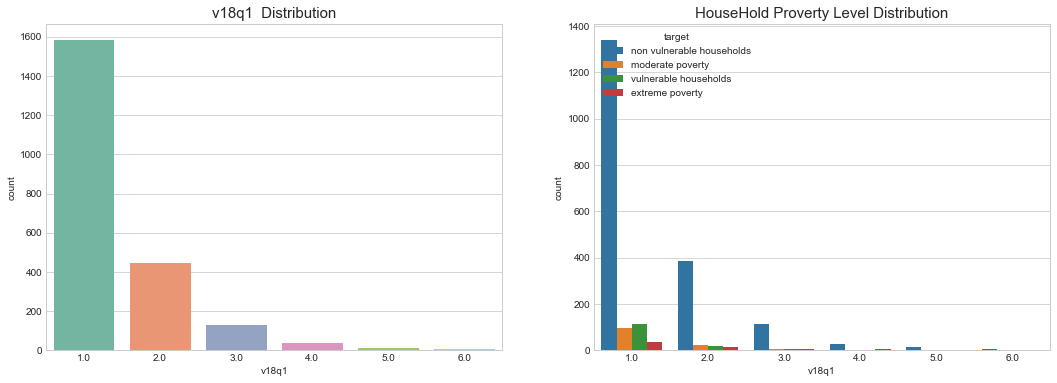

In [19]:
visual_dat= ['v18q1']


for i in visual_dat:
    plt.figure(figsize = (18,6))
    plt.subplot(1,2,1)
    sns.countplot(x=i, data=train_data, palette='Set2',).set_title(i + '  Distribution',fontsize=15)
    plt.subplot(1,2,2)
    sns.countplot(train_data[i],hue=train_data['target'])
    plt.title('HouseHold Proverty Level Distribution',fontsize=15)
    plt.show()

### if we see above given plot its clear that the story about which provety levels have and not have the house appliance based on plot we will get idea of which proverty levels too low.

## Gender and Age Distributions

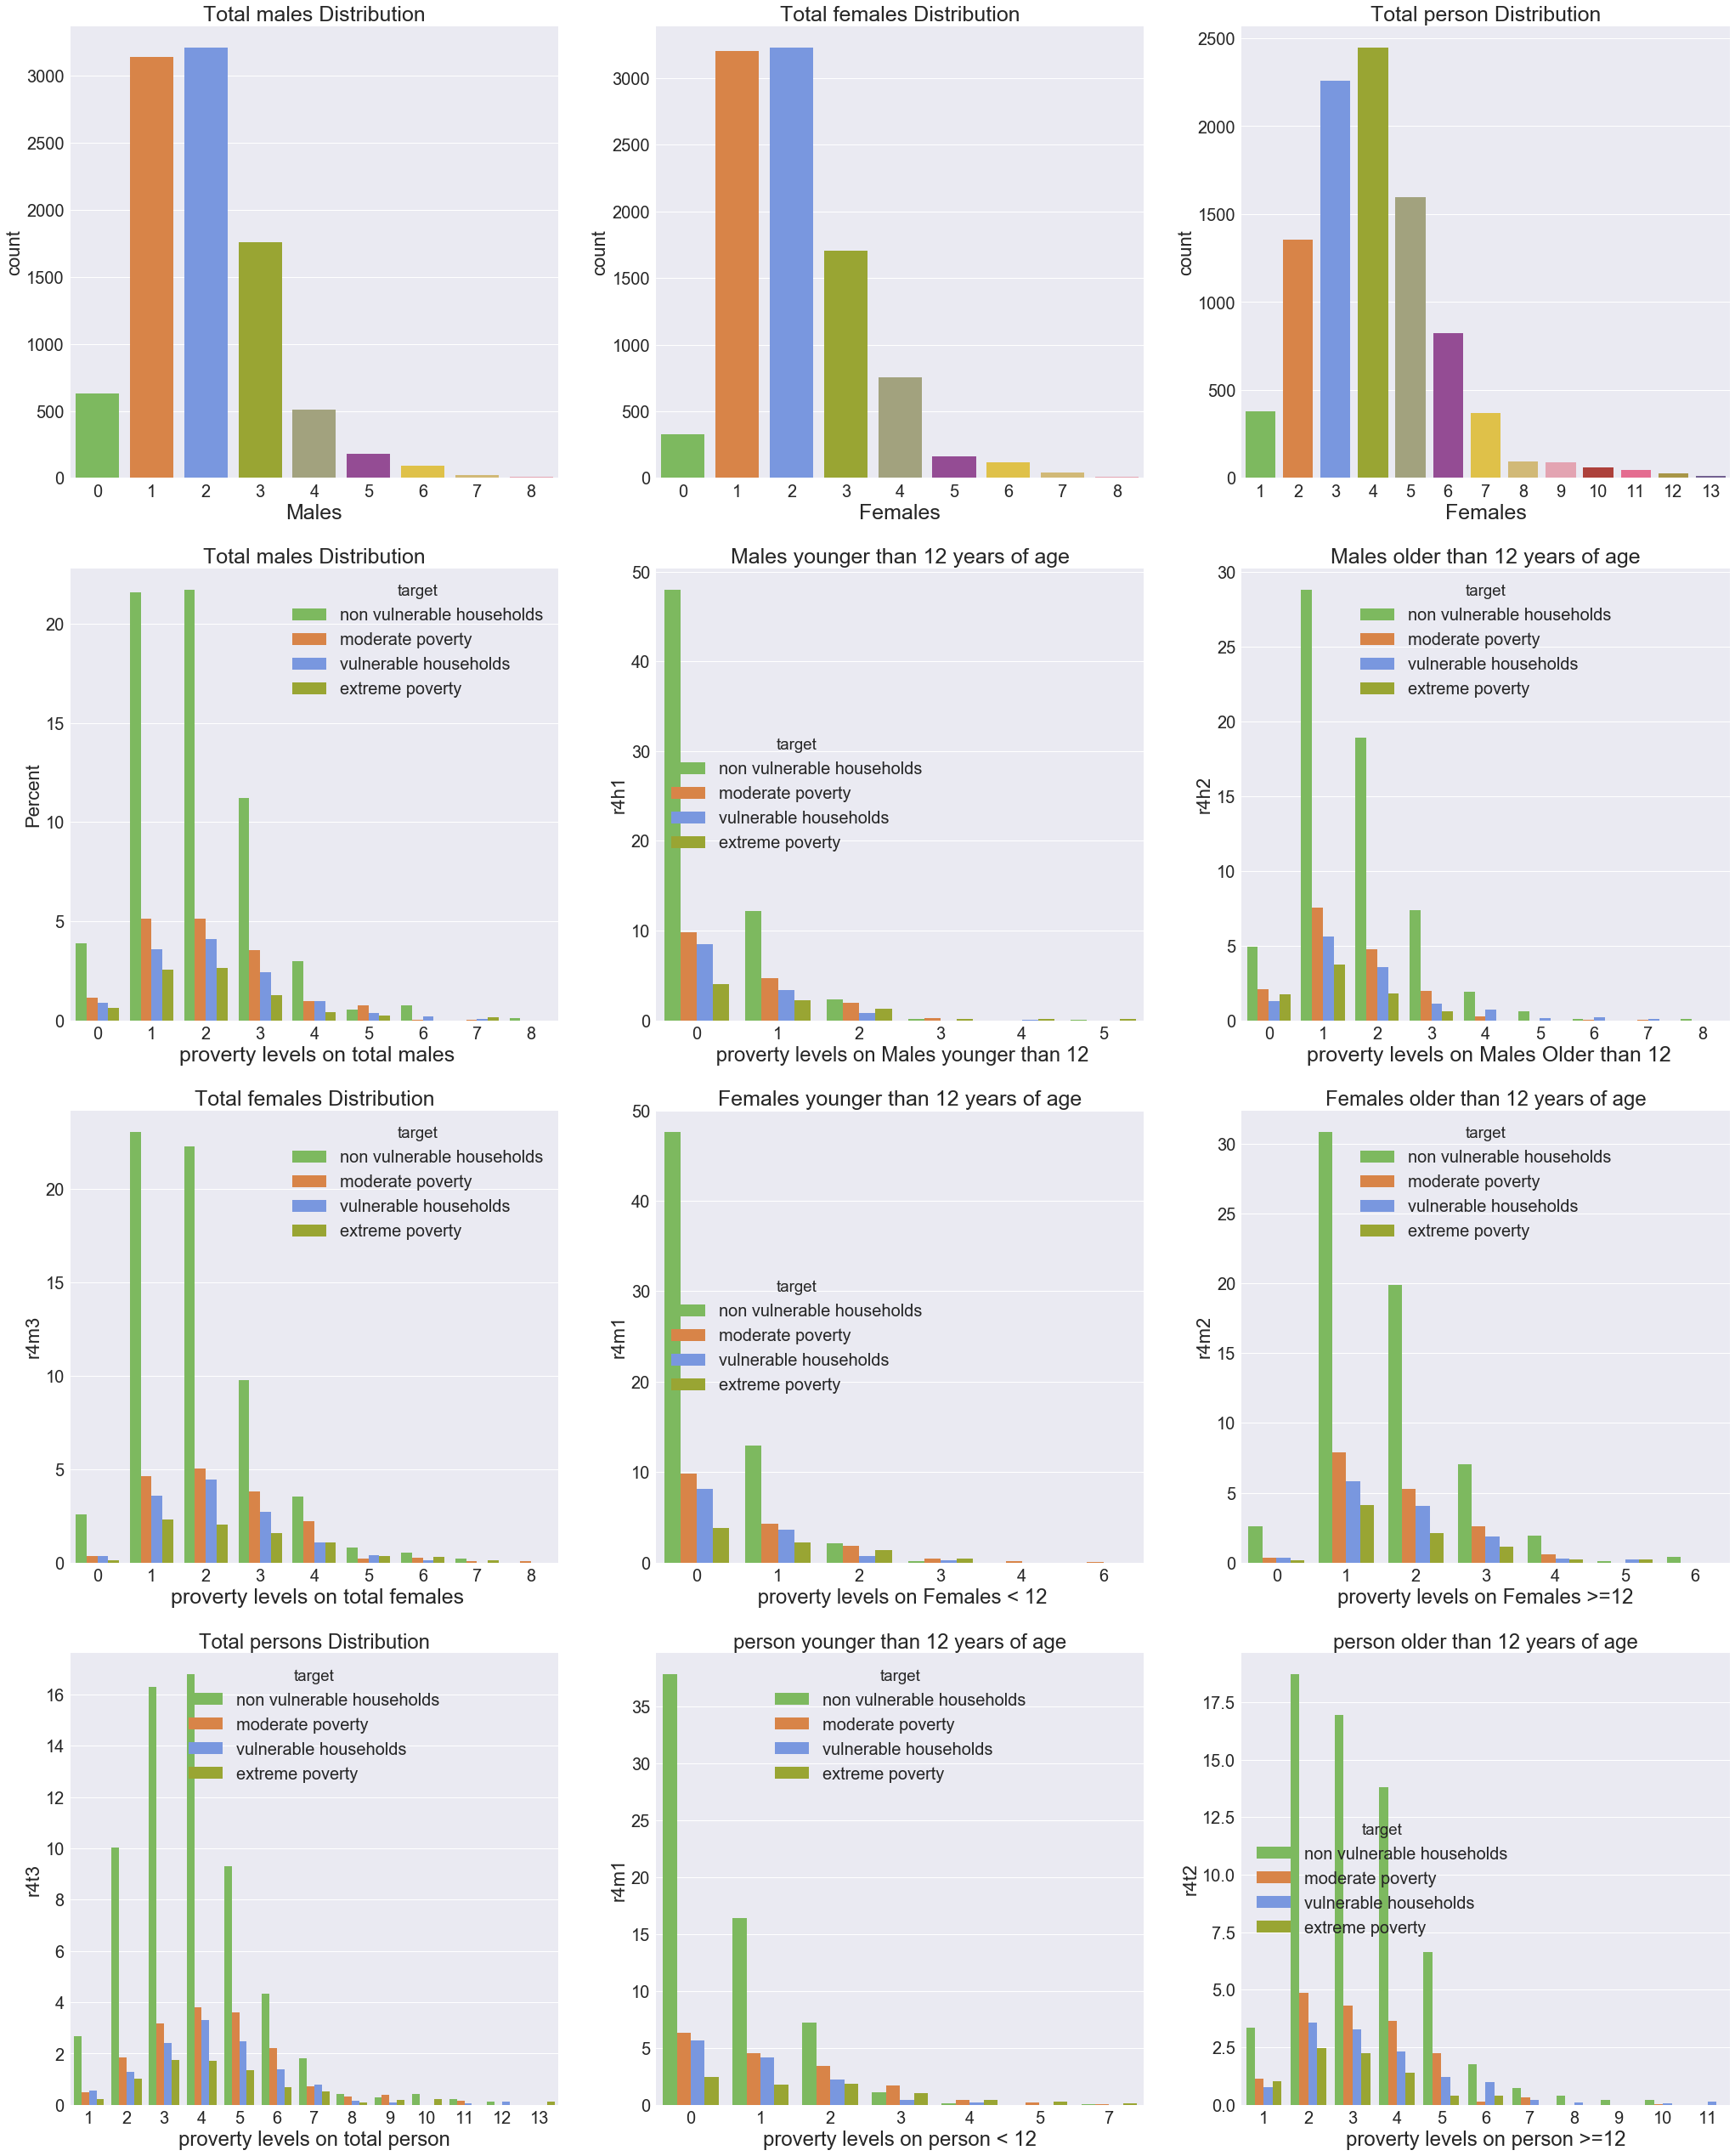

In [20]:
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
sns.set(font_scale=2) 
f, ax = plt.subplots(4,3,figsize=(35, 45))

sns.countplot(x='r4h3', data=train_data, palette=color_types,ax=ax[0,0]).set_title('Total males Distribution',fontsize=25)
ax[0,0].set_xlabel('Males', fontsize=25)

    
sns.countplot(x='r4m3', data=train_data, palette=color_types,ax=ax[0,1]).set_title('Total females Distribution',fontsize=25)
ax[0,1].set_xlabel('Females', fontsize=25)

sns.countplot(x='r4t3', data=train_data, palette=color_types,ax=ax[0,2]).set_title('Total person Distribution',fontsize=25)
ax[0,2].set_xlabel('Females', fontsize=25)

sns.barplot(x="r4h3", y="r4h3", hue="target", data=train_data, ax=ax[1,0],palette=color_types,
            estimator=lambda x: len(x) / len(train_data) * 100)
ax[1,0].set_title('Total males Distribution', fontsize=25)
ax[1,0].set(ylabel="Percent")
ax[1,0].set_xlabel(' proverty levels on total males', fontsize=25)

sns.barplot(x="r4h1", y="r4h1", hue="target", data=train_data, ax=ax[1,1],palette=color_types,
            estimator=lambda x: len(x) / len(train_data) * 100)
ax[1,1].set_title('Males younger than 12 years of age', fontsize=25)
ax[1,1].set_xlabel(' proverty levels on Males younger than 12', fontsize=24)

sns.barplot(x="r4h2", y="r4h2", hue="target", data=train_data, ax=ax[1,2],palette=color_types,
            estimator=lambda x: len(x) / len(train_data) * 100)
ax[1,2].set_title('Males older than 12 years of age', fontsize=25)
ax[1,2].set_xlabel(' proverty levels on Males Older than 12', fontsize=25)


sns.barplot(x="r4m3", y="r4m3", hue="target", data=train_data, ax=ax[2,0],palette=color_types,
            estimator=lambda x: len(x) / len(train_data) * 100)
ax[2,0].set_title('Total females Distribution', fontsize=25)

ax[2,0].set_xlabel(' proverty levels on total females', fontsize=25)

sns.barplot(x="r4m1", y="r4m1", hue="target", data=train_data, ax=ax[2,1],palette=color_types,
            estimator=lambda x: len(x) / len(train_data) * 100)
ax[2,1].set_title('Females younger than 12 years of age', fontsize=25)
ax[2,1].set_xlabel(' proverty levels on Females < 12', fontsize=24)

sns.barplot(x="r4m2", y="r4m2", hue="target", data=train_data, ax=ax[2,2],palette=color_types,
            estimator=lambda x: len(x) / len(train_data) * 100)
ax[2,2].set_title('Females older than 12 years of age', fontsize=24)
ax[2,2].set_xlabel('proverty levels on Females >=12', fontsize=24)


sns.barplot(x="r4t3", y="r4t3", hue="target", data=train_data, ax=ax[3,0],palette=color_types,
            estimator=lambda x: len(x) / len(train_data) * 100)
ax[3,0].set_title('Total persons Distribution', fontsize=24)
ax[3,0].set_xlabel('proverty levels on total person', fontsize=24)

sns.barplot(x="r4t1", y="r4m1", hue="target", data=train_data, ax=ax[3,1],palette=color_types,
            estimator=lambda x: len(x) / len(train_data) * 100)
ax[3,1].set_title('person younger than 12 years of age', fontsize=24)
ax[3,1].set_xlabel('proverty levels on person < 12', fontsize=24)

sns.barplot(x="r4t2", y="r4t2", hue="target", data=train_data, ax=ax[3,2],palette=color_types,
            estimator=lambda x: len(x) / len(train_data) * 100)
ax[3,2].set_title('person older than 12 years of age', fontsize=24)
ax[3,2].set_xlabel('proverty levels on person >=12', fontsize=24)
plt.show()


By looking at the above plot its clearly say which proverty of male and female has high and less count this is proof.

 ## Disable Persons Distribution 

[Text(0,0,'Not Disable'), Text(0,0,'Disable')]

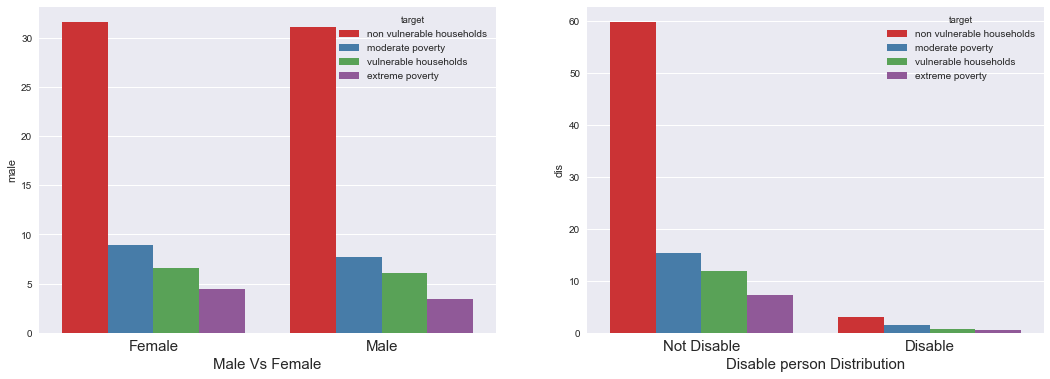

In [21]:
sns.set(font_scale=1)
f,ax=plt.subplots(1,2,figsize=(18,6))
l=['Female','Male']
sns.barplot(x="male", y="male", hue="target", data=train_data, palette='Set1',
            estimator=lambda x: len(x) / len(train_data) * 100,ax=ax[0])
ax[0].set_xlabel('Male Vs Female', fontsize=15)
ax[0].set_xticklabels(l, minor=False,fontsize=15)
la=['Not Disable','Disable']
sns.barplot(x="dis", y="dis", hue="target", data=train_data, palette='Set1',
            estimator=lambda x: len(x) / len(train_data) * 100)
ax[1].set_xlabel('Disable person Distribution', fontsize=15)
ax[1].set_xticklabels(la, minor=False,fontsize=15)

by looking  above given plot its clear that male count less exterme proverty and disable count is very less in all type provety group.

## Age Groups Distribution 

there are four differnt features like hogar_nin is show Number of children 0 to 19 in household, hogar_adul which shows Number of adults in household,hogar_mayor, which shows that individuals 65+ in the household and hogar_total is the  total individuals in the household

In [35]:
#train_data.hogar_nin.value_counts()
def plotre(df,t1='',t2='',t3=''):
    f,ax=plt.subplots(1,2,figsize=(18,6))
    sns.countplot(x=t1, data=df, palette='Set2',ax=ax[0]).set_title(t3 + ' Distribution',fontsize=15)
    ax[0].set_xlabel(t3, fontsize=15)
    sns.barplot(x=t1, y=t1, hue=t2, data=df, estimator=lambda x: len(x) / len(df) * 100,ax=ax[1])
    ax[1].set_title(' Proverty Levels Based On ' + t3 +' Distribution',fontsize=15)
    ax[1].set(ylabel="Percent")
    ax[1].set_xlabel(t3, fontsize=15)
    a=plt.show()
    return a

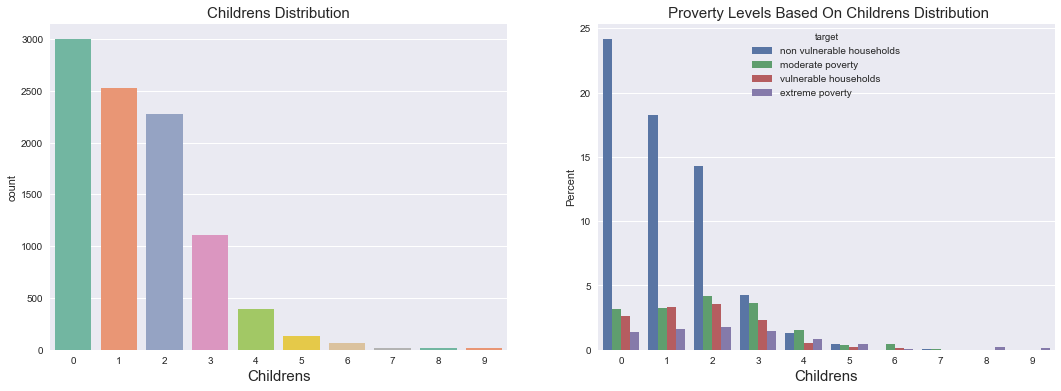

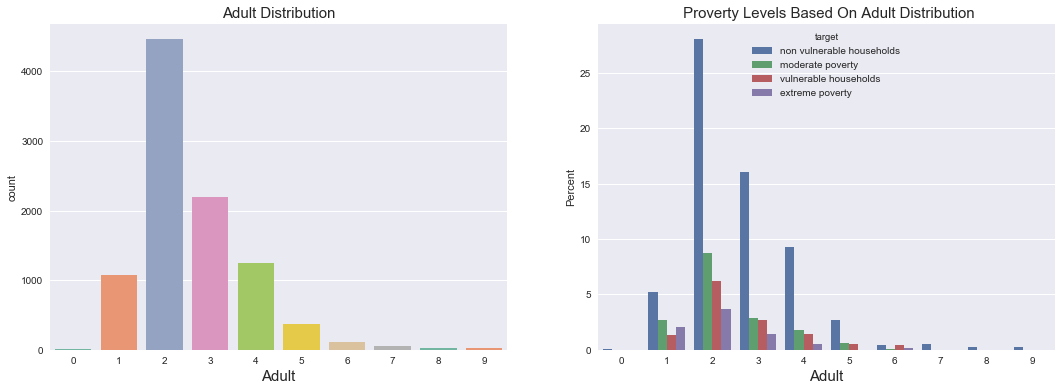

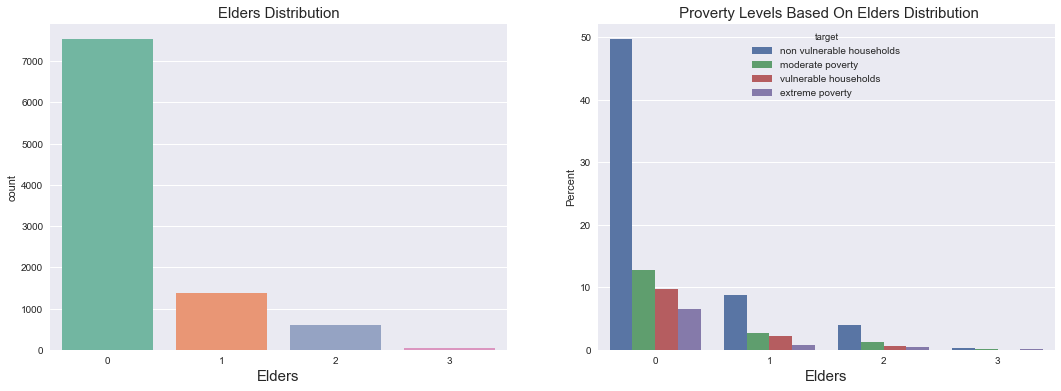

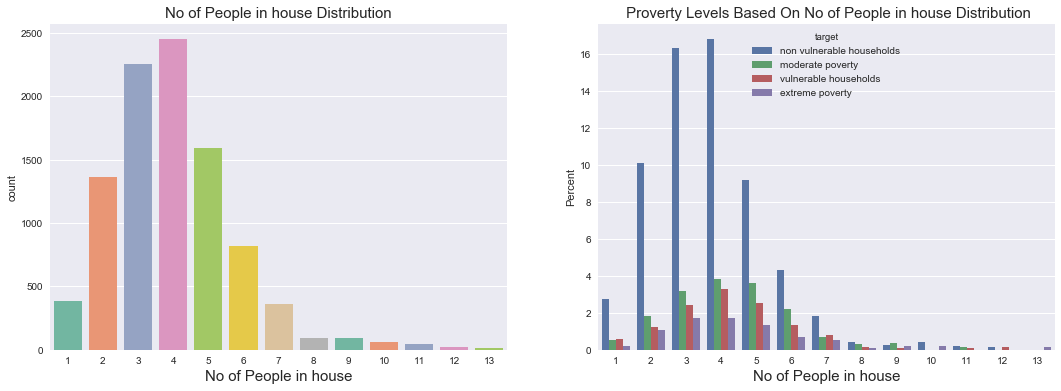

In [23]:
plotre(train_data,'hogar_nin','target','Childrens')
plotre(train_data,'hogar_adul','target','Adult')
plotre(train_data,'hogar_mayor','target','Elders')
plotre(train_data,'tamhog','target','No of People in house')

By seeing the above given plot its clear proverty level is high in house of up 6 people in house
Elders rate low in proverty level and house with upto 5 childrens has high count of all proverty level and house have adult 4 has high count provety compare to other

## Education Details

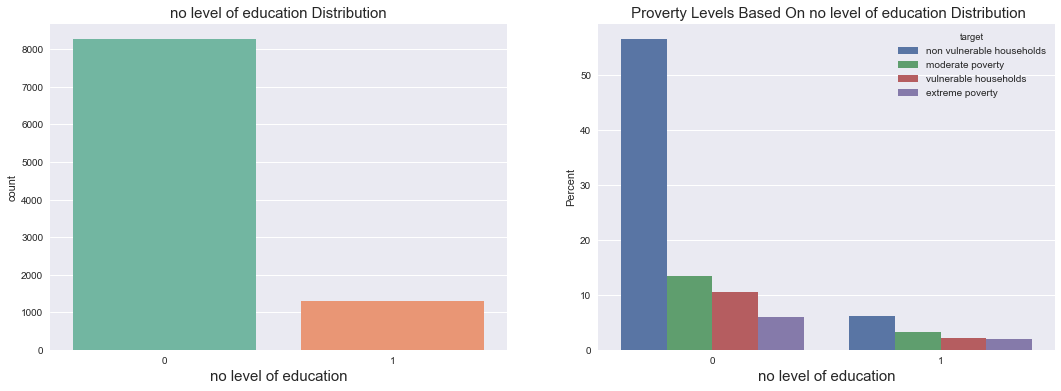

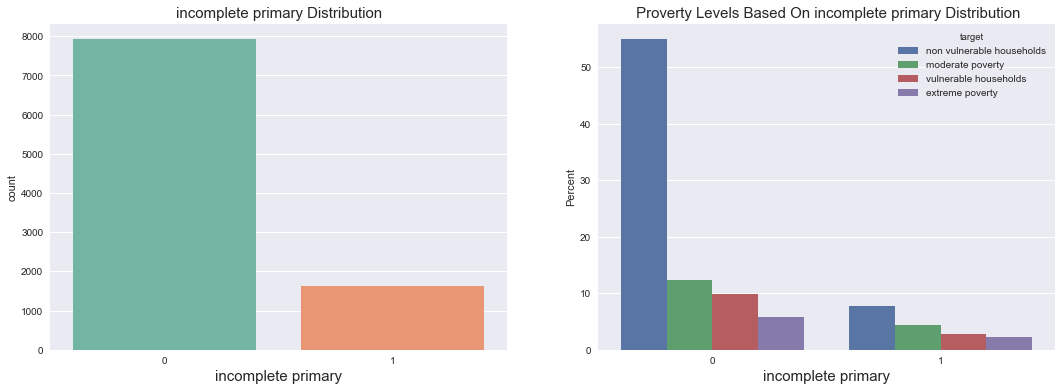

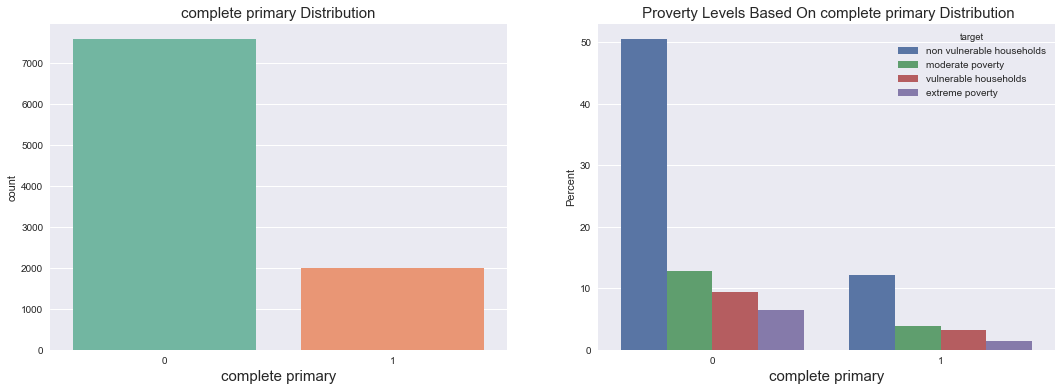

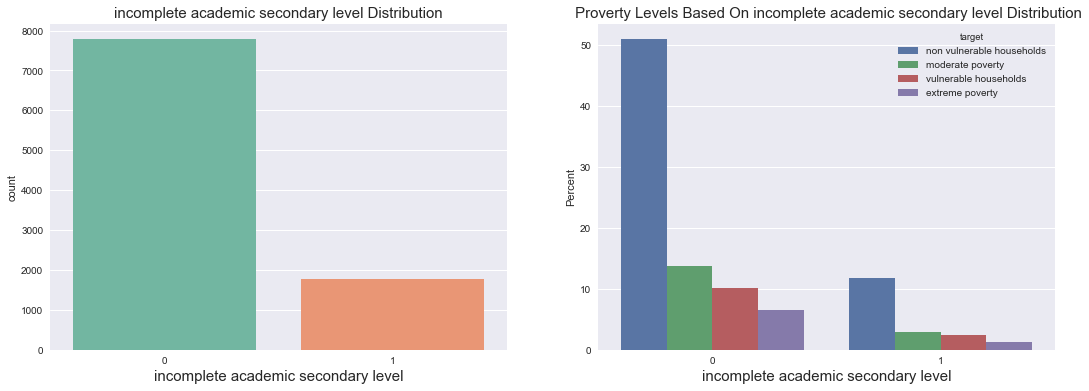

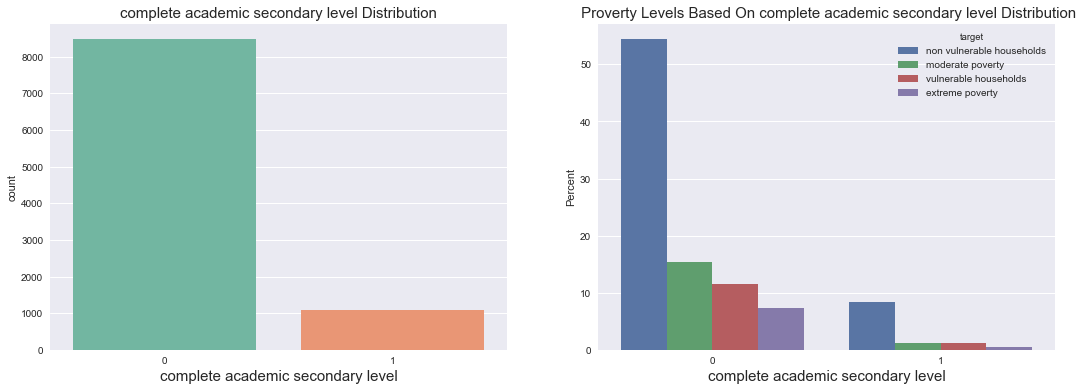

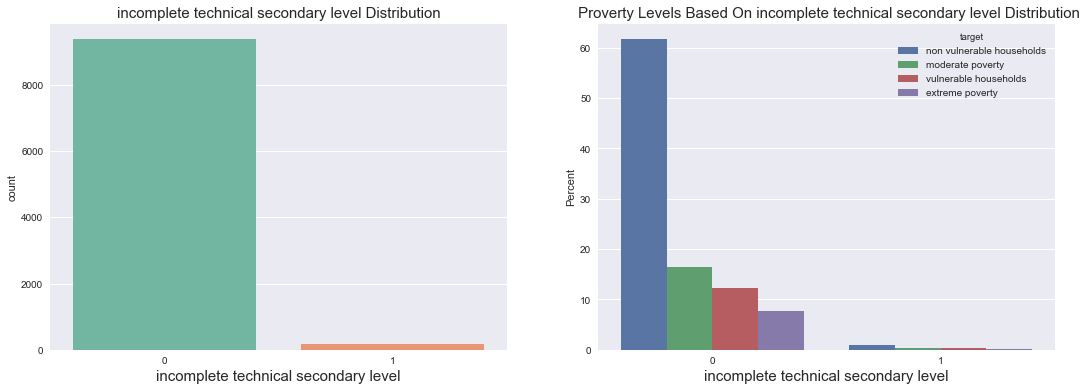

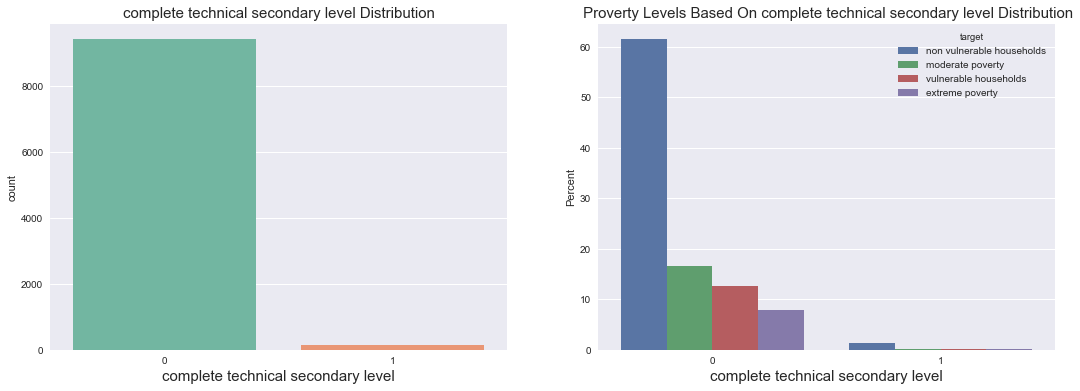

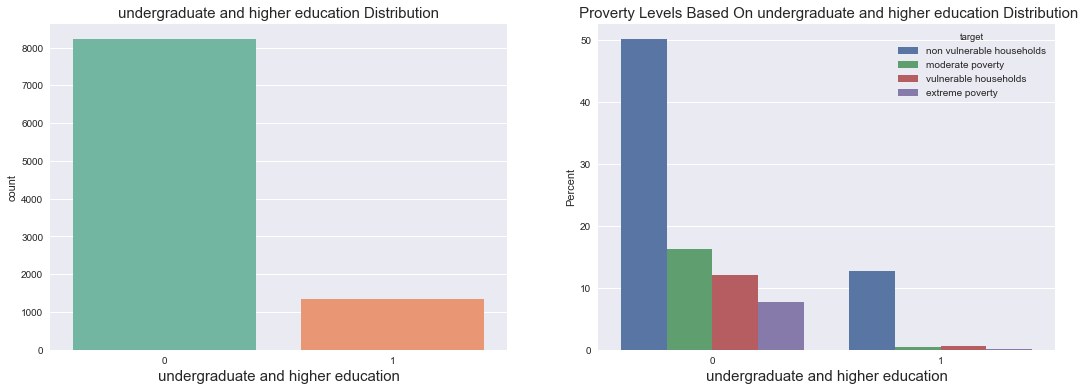

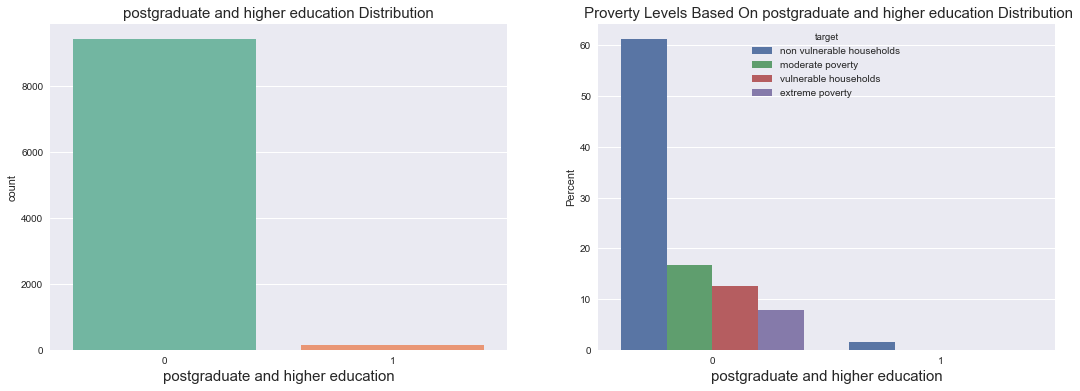

In [24]:
plotre(train_data,'instlevel1','target','no level of education')
plotre(train_data,'instlevel2','target','incomplete primary')
plotre(train_data,'instlevel3','target','complete primary')
plotre(train_data,'instlevel4','target','incomplete academic secondary level')
plotre(train_data,'instlevel5','target','complete academic secondary level')
plotre(train_data,'instlevel6','target','incomplete technical secondary level')
plotre(train_data,'instlevel7','target','complete technical secondary level')
plotre(train_data,'instlevel8','target','undergraduate and higher education')
plotre(train_data,'instlevel9','target','postgraduate and higher education')

by looking at above data given here are some conclusions

the number of people completed PG are not in Proverty levels only few person in proverty after completing pg

they are less number people in proverty level after completing Ug

they are less number people in proverty level after completing technical secondary level

the people how did not completed the technical secondary level has highest proverty counts in all gruop.

so based education we can also deciede the proverty levels among the groups.

## Family Material Status 


In [32]:
def plotr(df,t1='',t2='',t3=''):
    f,ax=plt.subplots(1,figsize=(12,4))
    sns.countplot(x=(df[df[t1]==1][t2]) , hue=df[t2], palette='Set1')
    ax.set_title('HouseHold Proverty Levels Based On '+ t3,fontsize=15)
    ax.set(ylabel="count")
    ax.set_xlabel(t3, fontsize=15)
    #plt.xticks(rotation=-90)
    a=plt.show()
    return a

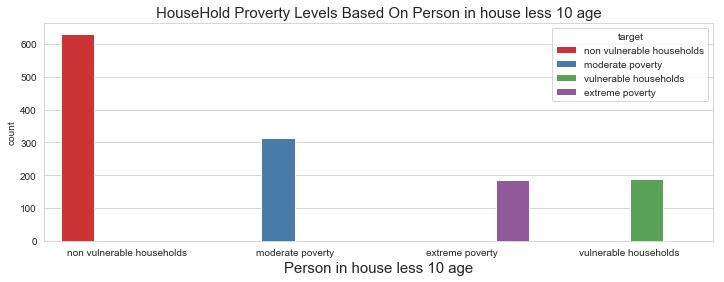

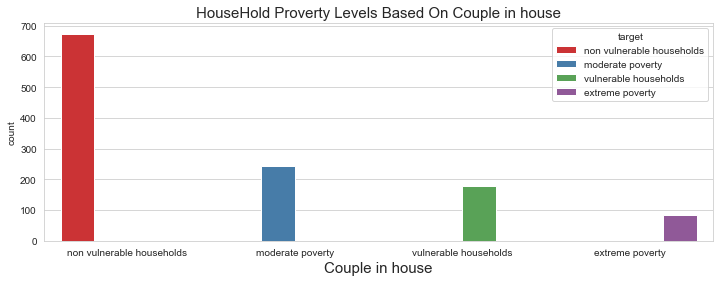

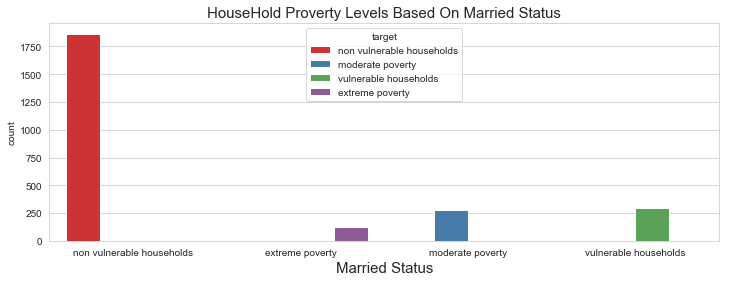

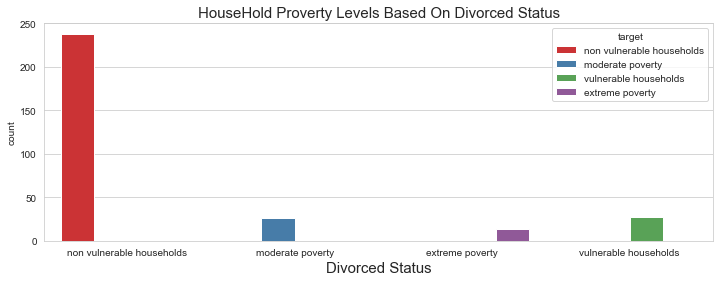

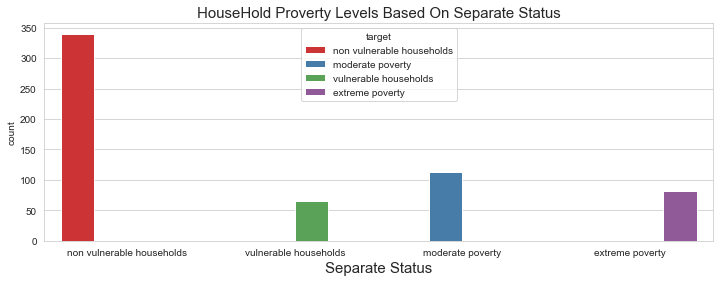

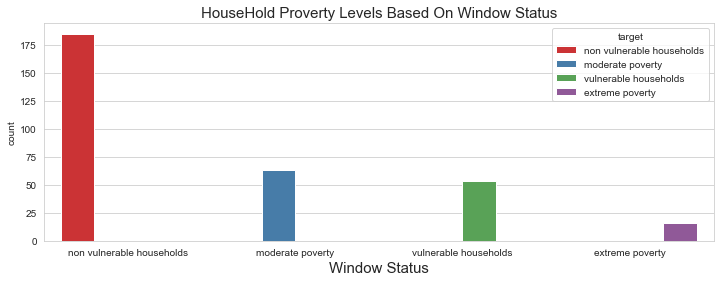

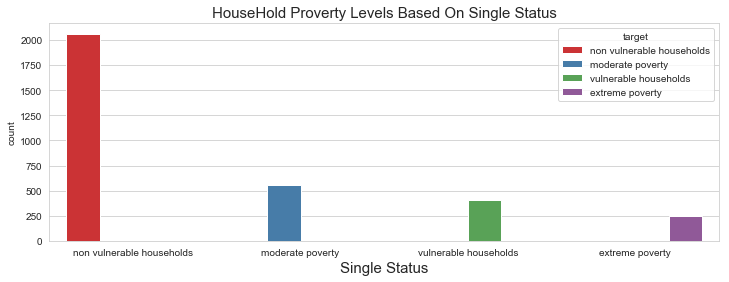

In [33]:
plotr(train_data,'estadocivil1','target','Person in house less 10 age')
plotr(train_data,'estadocivil2','target','Couple in house')
plotr(train_data,'estadocivil3','target','Married Status')
plotr(train_data,'estadocivil4','target','Divorced Status')
plotr(train_data,'estadocivil5','target','Separate Status')
plotr(train_data,'estadocivil6','target','Window Status')
plotr(train_data,'estadocivil7','target','Single Status')

## Family Members in HouseHold

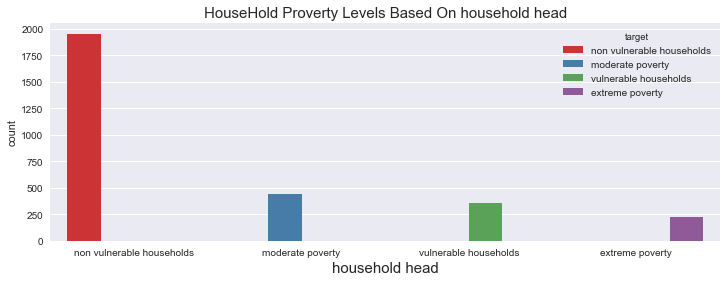

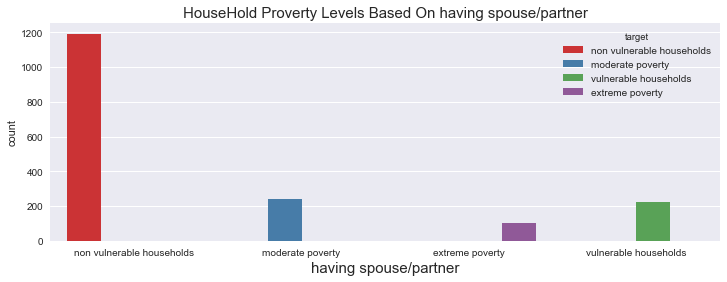

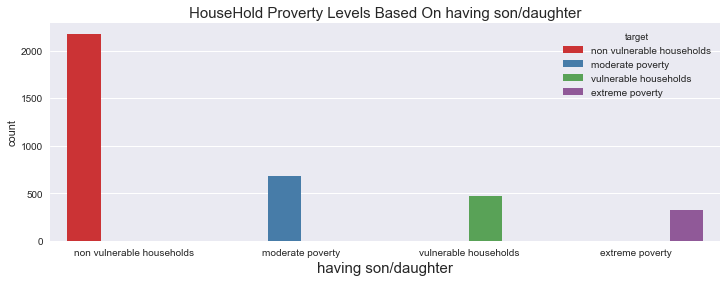

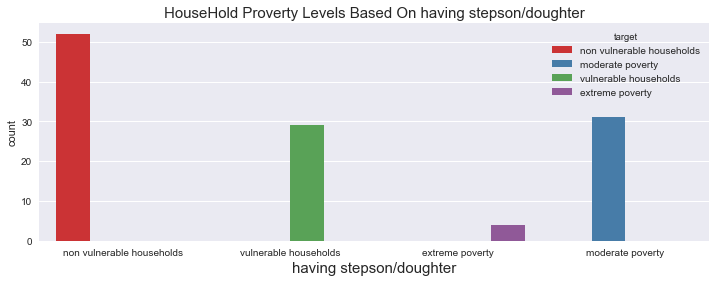

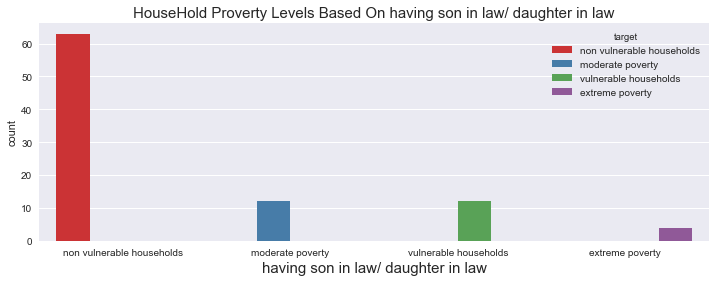

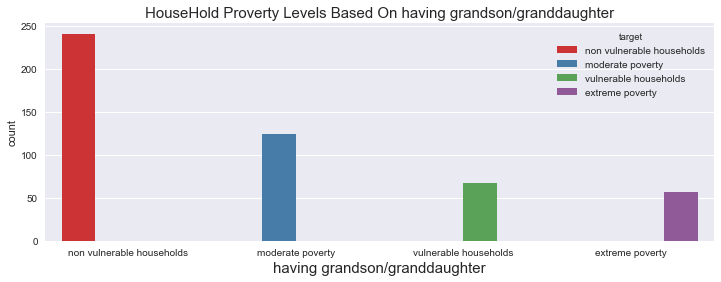

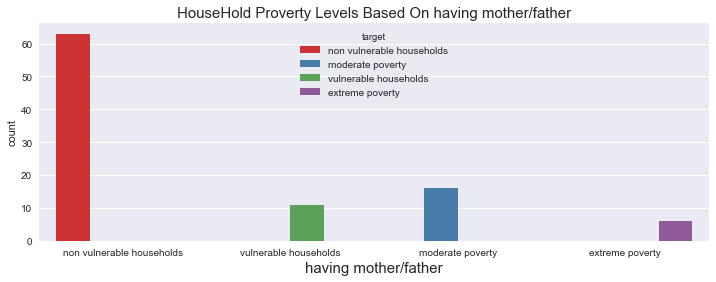

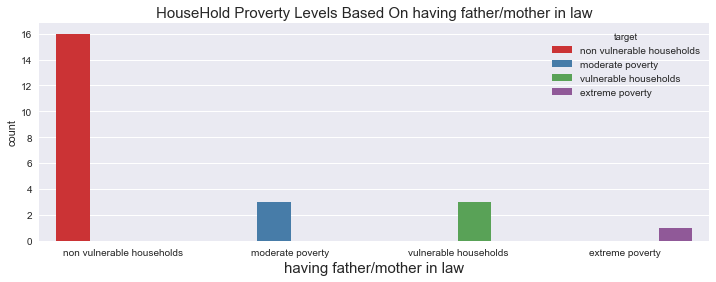

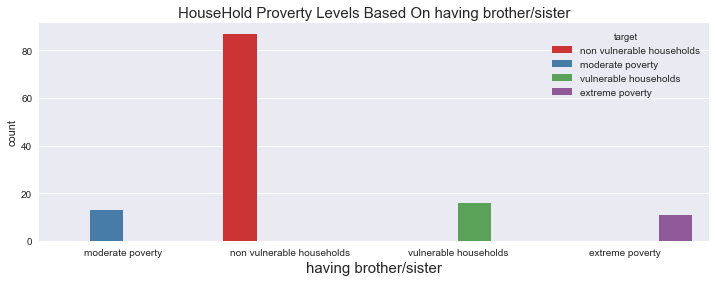

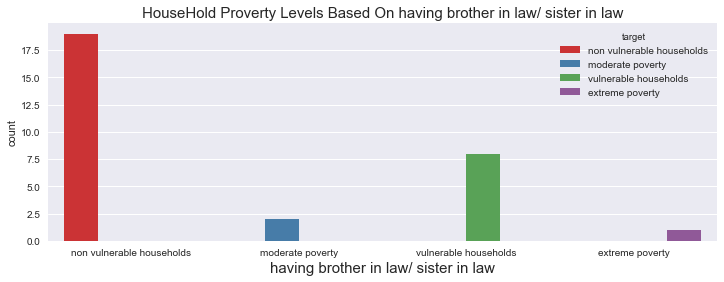

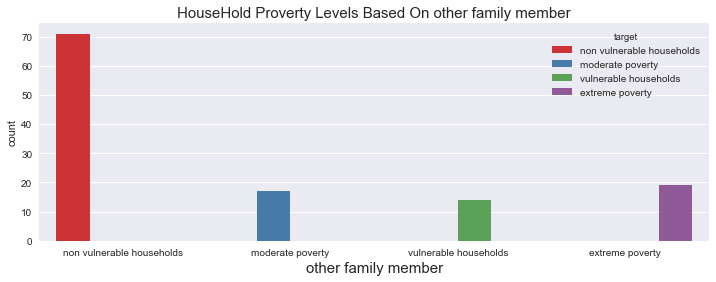

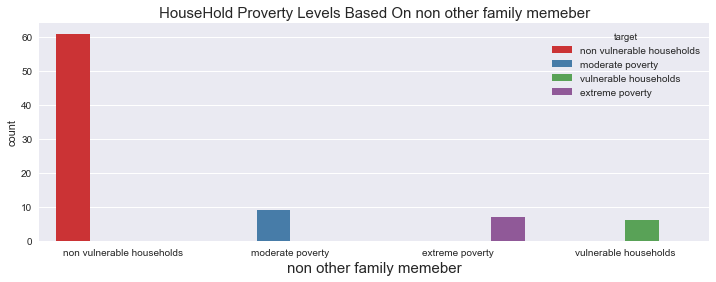

In [27]:
plotr(train_data,'parentesco1','target','household head')
plotr(train_data,'parentesco2','target','having spouse/partner')
plotr(train_data,'parentesco3','target','having son/daughter')
plotr(train_data,'parentesco4','target','having stepson/doughter')
plotr(train_data,'parentesco5','target','having son in law/ daughter in law')
plotr(train_data,'parentesco6','target','having grandson/granddaughter')
plotr(train_data,'parentesco7','target','having mother/father')
plotr(train_data,'parentesco8','target','having father/mother in law')
plotr(train_data,'parentesco9','target','having brother/sister')
plotr(train_data,'parentesco10','target','having brother in law/ sister in law')
plotr(train_data,'parentesco11','target','other family member')
plotr(train_data,'parentesco12','target','non other family memeber')

In [28]:
train=train_data



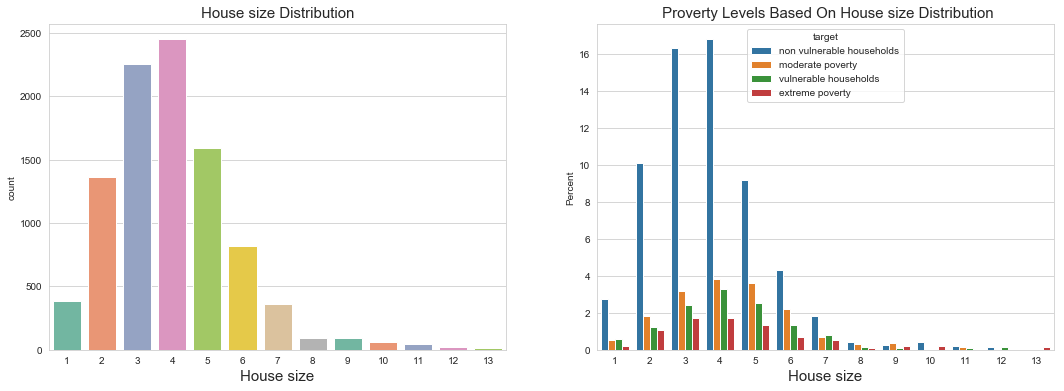

In [36]:

plotre(train_data,'tamhog','target','House size')

## Household Number of Rooms 

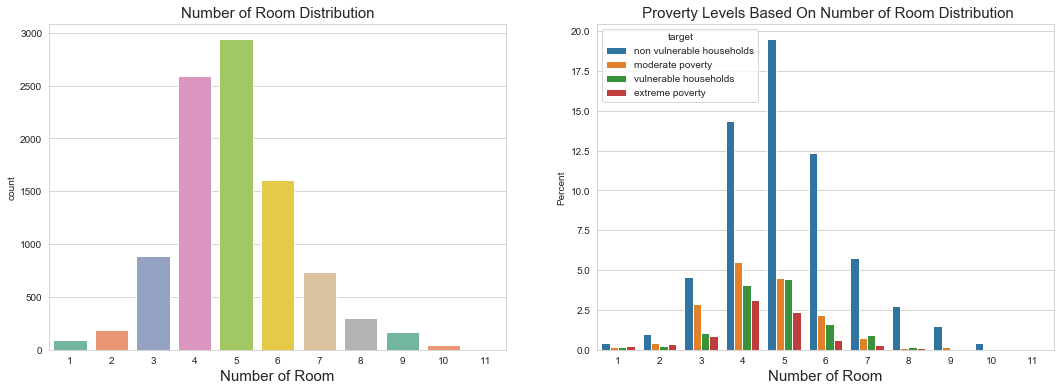

In [37]:
plotre(train_data,'rooms','target','Number of Room')

## Household Has Bathroom or Not

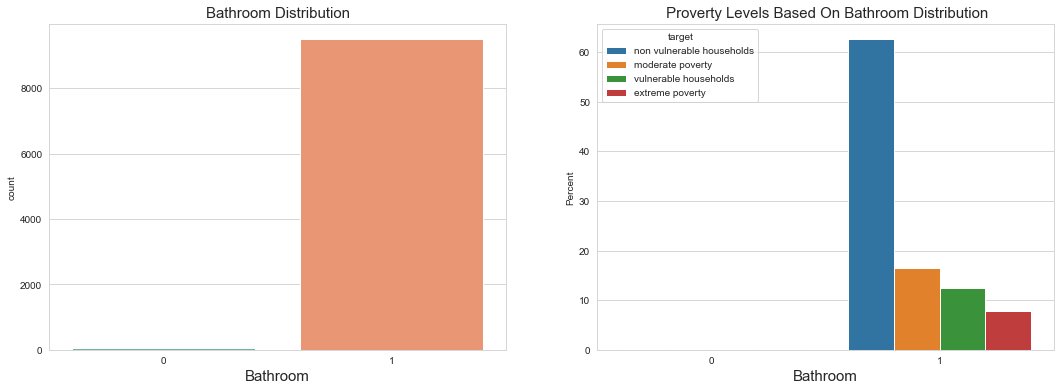

In [38]:
plotre(train_data,'v14a','target','Bathroom')

## Size of house VS Rent in proverty group

Text(0.5, 0, 'House rent')

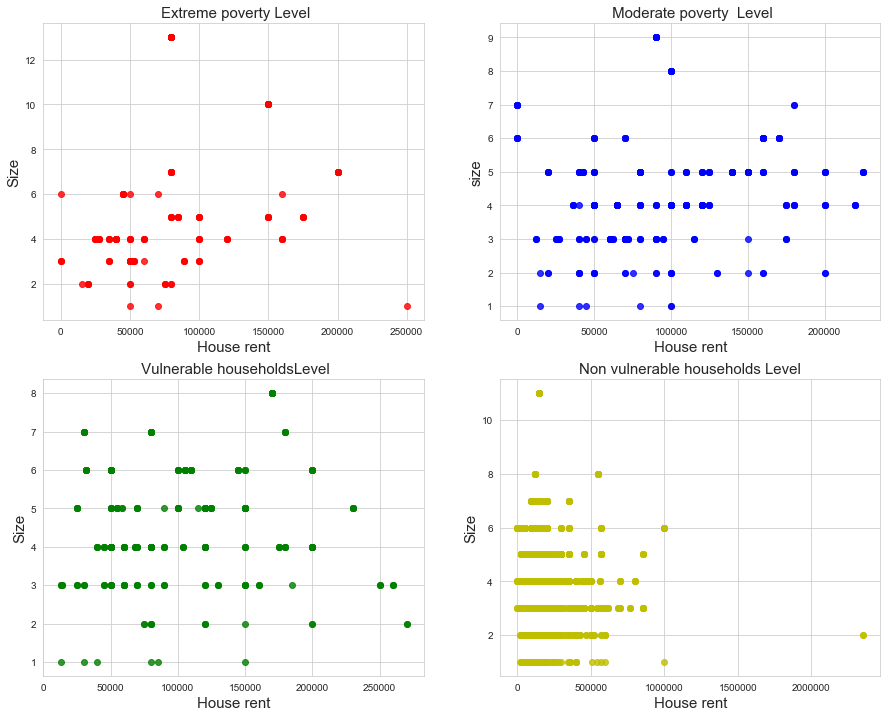

In [39]:
train1 = train[train['Target'] == 1]
train2 = train[train['Target'] == 2]
train3 = train[train['Target'] == 3]
train4 = train[train['Target'] == 4]
f,ax=plt.subplots(2,2,figsize=(15,12))
sns.regplot(x=train1['v2a1'], y=train1['tamhog'],fit_reg=False,color='r',ax=ax[0,0])
ax[0,0].set_title(' Extreme poverty Level',fontsize=15)
ax[0,0].set_ylabel("Size",fontsize=15)
ax[0,0].set_xlabel('House rent' ,fontsize=15)
sns.regplot(x=train2['v2a1'], y=train2['tamhog'],fit_reg=False,color='b',ax=ax[0,1])
ax[0,1].set_title(' Moderate poverty  Level',fontsize=15)
ax[0,1].set_ylabel("size",fontsize=15)
ax[0,1].set_xlabel('House rent' ,fontsize=15)
sns.regplot(x=train3['v2a1'], y=train3['tamhog'],fit_reg=False,color='g',ax=ax[1,0])
ax[1,0].set_title(' Vulnerable householdsLevel',fontsize=15)
ax[1,0].set_ylabel("Size",fontsize=15)
ax[1,0].set_xlabel('House rent' ,fontsize=15)
sns.regplot(x=train4['v2a1'], y=train4['tamhog'],fit_reg=False,color='y',ax=ax[1,1])
ax[1,1].set_title('Non vulnerable households Level',fontsize=15)
ax[1,1].set_ylabel("Size",fontsize=15)
ax[1,1].set_xlabel('House rent' ,fontsize=15)

## Number Rooms in house  Vs Rent on Proverty Groups


Text(0.5,0,'House rent')

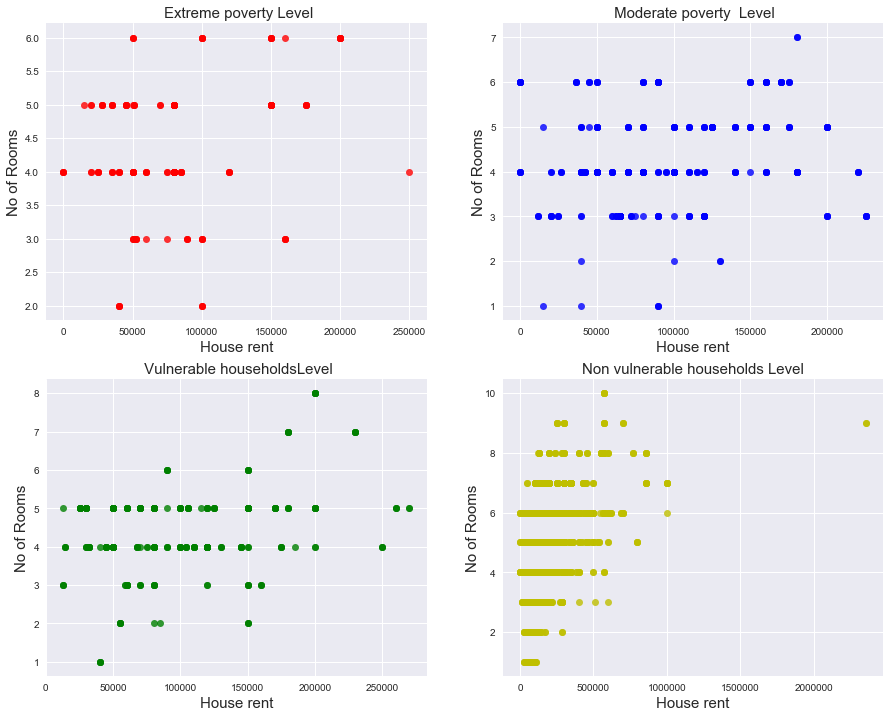

In [33]:
train1 = train[train['Target'] == 1]
train2 = train[train['Target'] == 2]
train3 = train[train['Target'] == 3]
train4 = train[train['Target'] == 4]
f,ax=plt.subplots(2,2,figsize=(15,12))
sns.regplot(x=train1['v2a1'], y=train1['rooms'],fit_reg=False,color='r',ax=ax[0,0])
ax[0,0].set_title(' Extreme poverty Level',fontsize=15)
ax[0,0].set_ylabel("No of Rooms",fontsize=15)
ax[0,0].set_xlabel('House rent' ,fontsize=15)
sns.regplot(x=train2['v2a1'], y=train2['rooms'],fit_reg=False,color='b',ax=ax[0,1])
ax[0,1].set_title(' Moderate poverty  Level',fontsize=15)
ax[0,1].set_ylabel("No of Rooms",fontsize=15)
ax[0,1].set_xlabel('House rent' ,fontsize=15)
sns.regplot(x=train3['v2a1'], y=train3['rooms'],fit_reg=False,color='g',ax=ax[1,0])
ax[1,0].set_title(' Vulnerable householdsLevel',fontsize=15)
ax[1,0].set_ylabel("No of Rooms",fontsize=15)
ax[1,0].set_xlabel('House rent' ,fontsize=15)
sns.regplot(x=train4['v2a1'], y=train4['rooms'],fit_reg=False,color='y',ax=ax[1,1])
ax[1,1].set_title('Non vulnerable households Level',fontsize=15)
ax[1,1].set_ylabel("No of Rooms",fontsize=15)
ax[1,1].set_xlabel('House rent' ,fontsize=15)

## Age of house Vs Rent on Proverty groups

Text(0.5,0,'House rent')

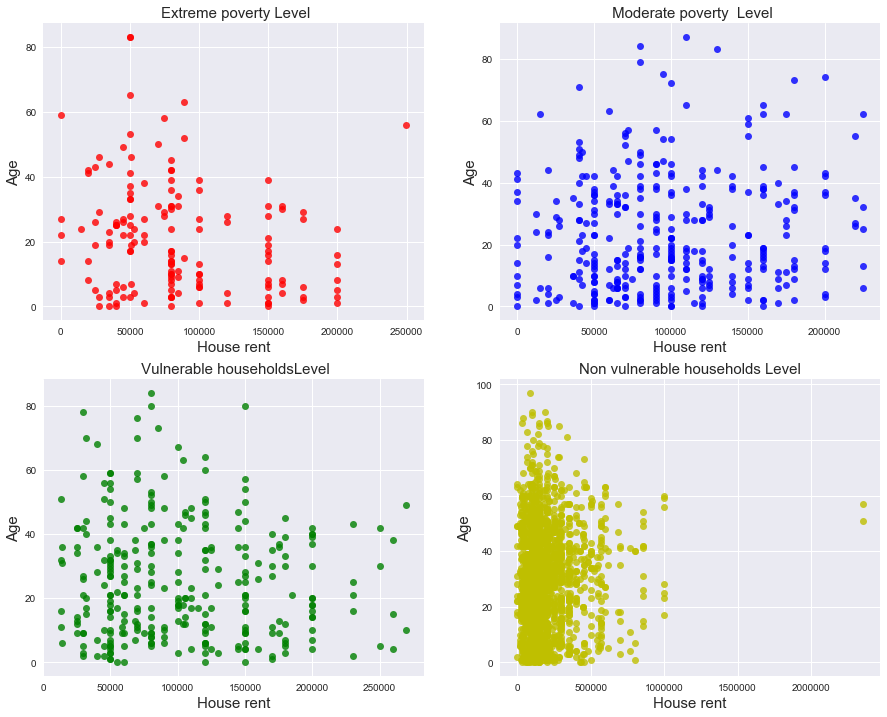

In [34]:
f,ax=plt.subplots(2,2,figsize=(15,12))
sns.regplot(x=train1['v2a1'], y=train1['age'],fit_reg=False,color='r',ax=ax[0,0])
ax[0,0].set_title(' Extreme poverty Level',fontsize=15)
ax[0,0].set_ylabel("Age",fontsize=15)
ax[0,0].set_xlabel('House rent' ,fontsize=15)
sns.regplot(x=train2['v2a1'], y=train2['age'],fit_reg=False,color='b',ax=ax[0,1])
ax[0,1].set_title(' Moderate poverty  Level',fontsize=15)
ax[0,1].set_ylabel("Age",fontsize=15)
ax[0,1].set_xlabel('House rent' ,fontsize=15)
sns.regplot(x=train3['v2a1'], y=train3['age'],fit_reg=False,color='g',ax=ax[1,0])
ax[1,0].set_title(' Vulnerable householdsLevel',fontsize=15)
ax[1,0].set_ylabel("Age",fontsize=15)
ax[1,0].set_xlabel('House rent' ,fontsize=15)
sns.regplot(x=train4['v2a1'], y=train4['age'],fit_reg=False,color='y',ax=ax[1,1])
ax[1,1].set_title('Non vulnerable households Level',fontsize=15)
ax[1,1].set_ylabel("Age",fontsize=15)
ax[1,1].set_xlabel('House rent' ,fontsize=15)

## Number of Rooms Vs People Living on the Proverty groups 

Text(0.5,0,'No of people')

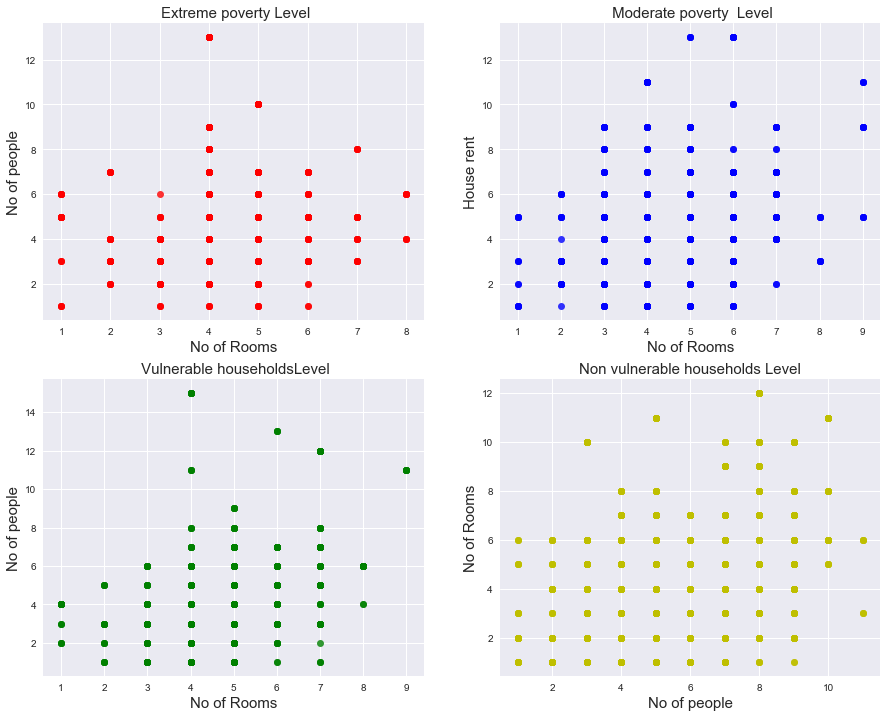

In [35]:
f,ax=plt.subplots(2,2,figsize=(15,12))
sns.regplot(x=train1['rooms'], y=train1['tamviv'],fit_reg=False,color='r',ax=ax[0,0])
ax[0,0].set_title(' Extreme poverty Level',fontsize=15)
ax[0,0].set_xlabel("No of Rooms",fontsize=15)
ax[0,0].set_ylabel('No of people' ,fontsize=15)
sns.regplot(y=train2['tamviv'], x=train2['rooms'],fit_reg=False,color='b',ax=ax[0,1])
ax[0,1].set_title(' Moderate poverty  Level',fontsize=15)
ax[0,1].set_xlabel("No of Rooms",fontsize=15)
ax[0,1].set_ylabel('House rent' ,fontsize=15)
sns.regplot(y=train3['tamviv'], x=train3['rooms'],fit_reg=False,color='g',ax=ax[1,0])
ax[1,0].set_title(' Vulnerable householdsLevel',fontsize=15)
ax[1,0].set_xlabel("No of Rooms",fontsize=15)
ax[1,0].set_ylabel('No of people' ,fontsize=15)
sns.regplot(y=train4['tamviv'], x=train4['rooms'],fit_reg=False,color='y',ax=ax[1,1])
ax[1,1].set_title('Non vulnerable households Level',fontsize=15)
ax[1,1].set_ylabel("No of Rooms",fontsize=15)
ax[1,1].set_xlabel('No of people' ,fontsize=15)


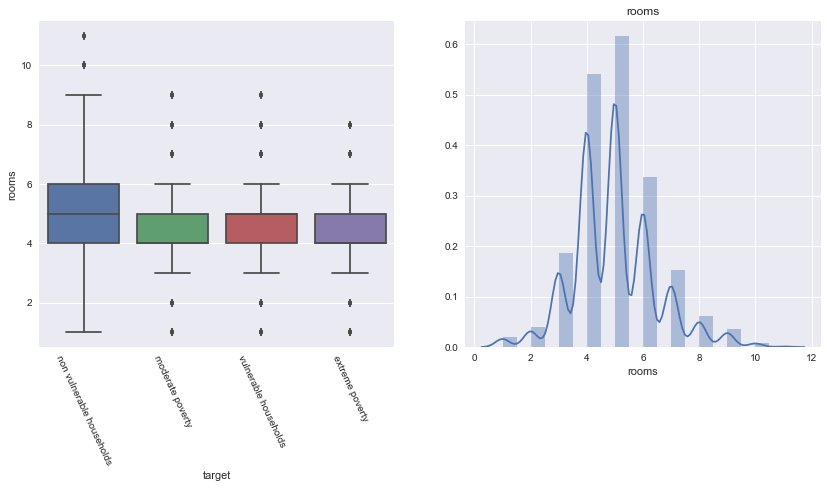

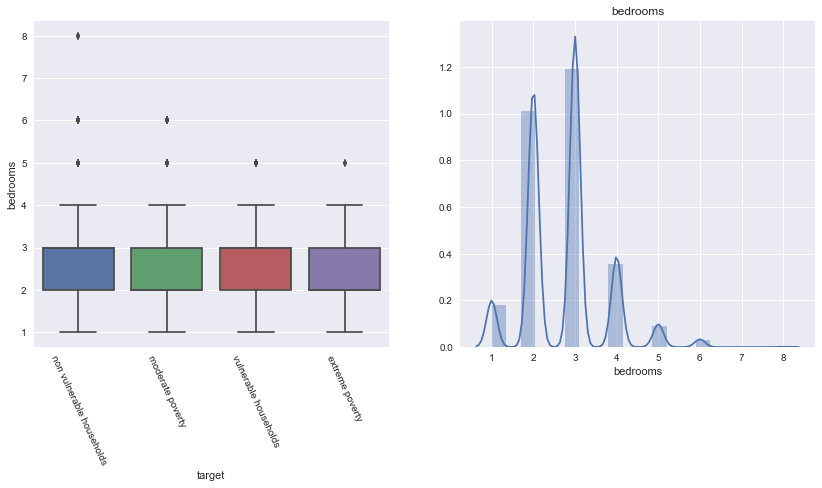

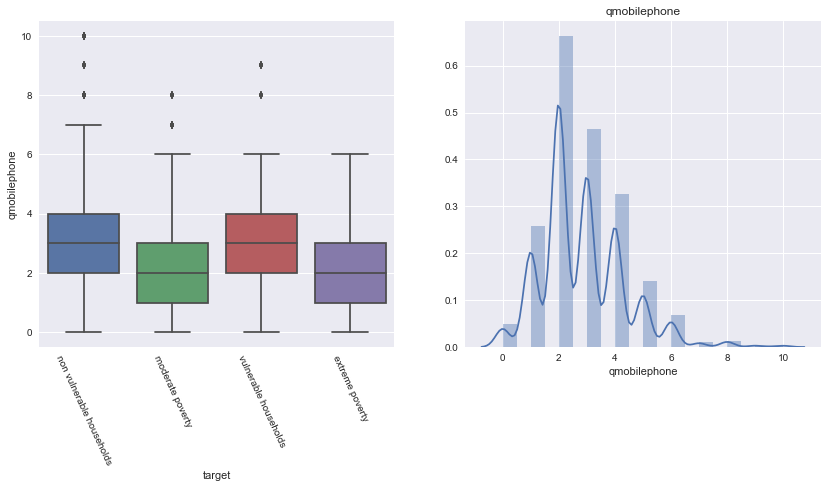

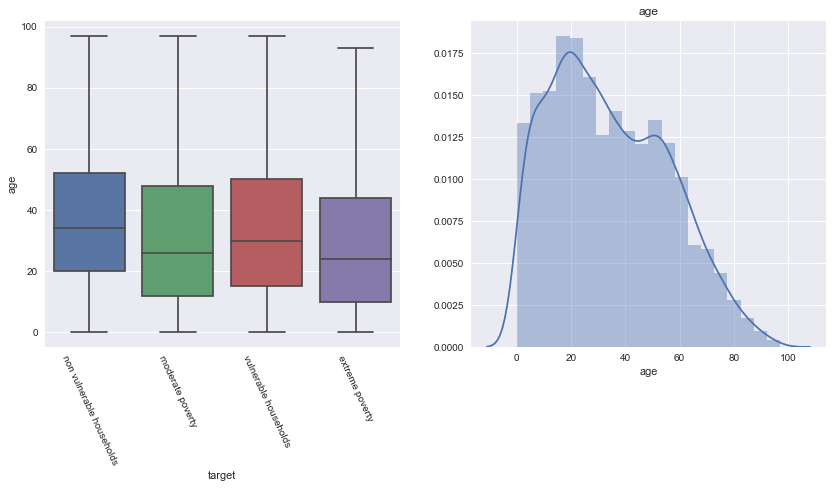

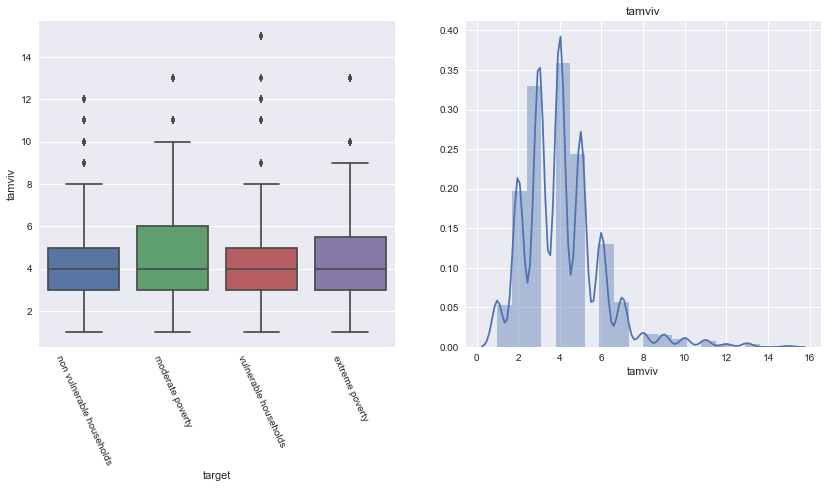

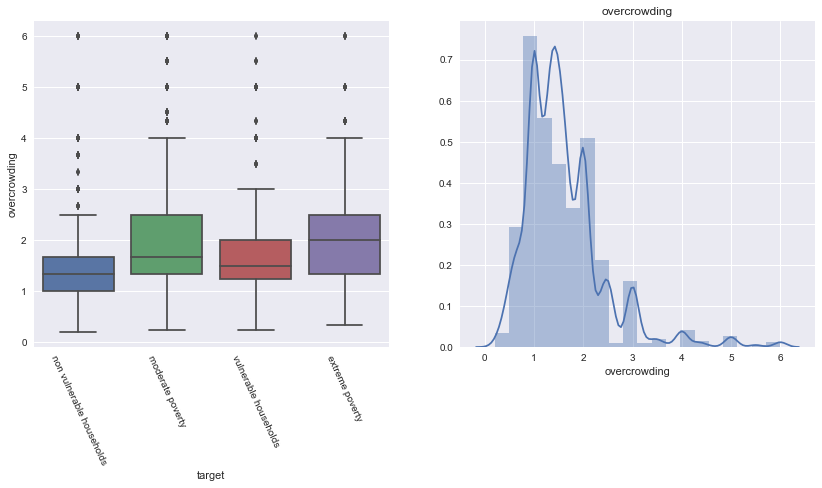

In [36]:
visual_dat= ['rooms','bedrooms','qmobilephone','age','tamviv','overcrowding']

for i in visual_dat:
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    plt.xticks(rotation=-65)
    sns.boxplot(x=train.target,y=train[i])
    plt.subplot(1,2,2)
    sns.distplot(train[i],bins= 20)    
    plt.title(i)    
    plt.show()

In [40]:
drop_col=['target']
train_data.drop(drop_col, axis=1, inplace = True)

## Correlation Between The Features

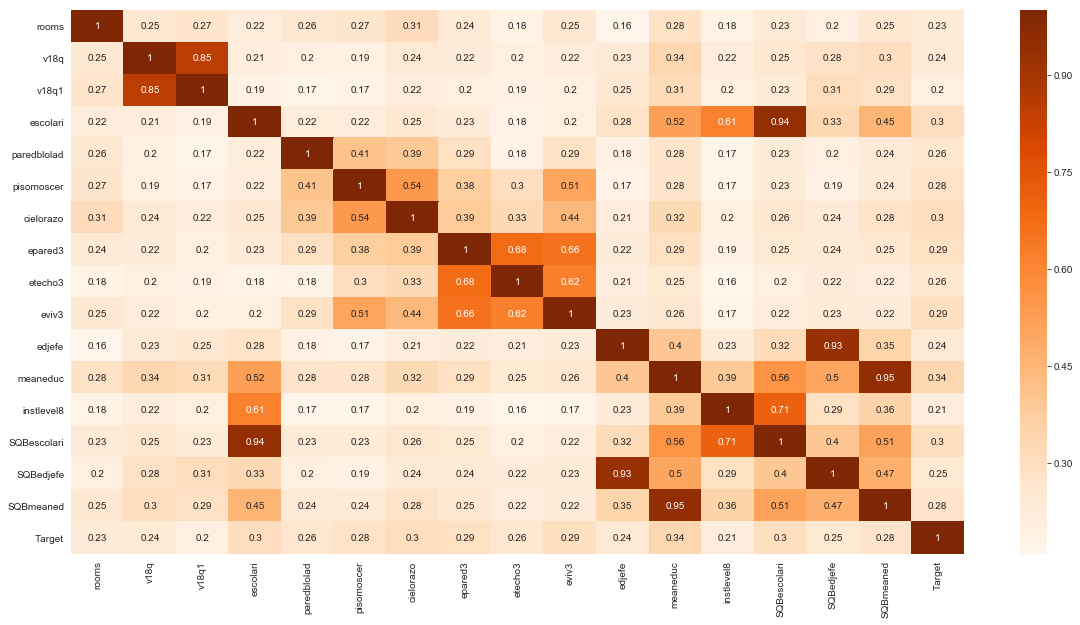

In [71]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["Target"]>0.2)]
plt.figure(figsize=(20,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="Oranges")

## 2.Data preprocessing 
 ###         2.1. Handilng Outliers

In [39]:

test_data.loc[test_data['rez_esc'] == 99.0 , 'rez_esc'] = 5


## 2.2 Handling missing data

rez_esc represents "years behind in school", missing value could be filled as 0

meaneduc is missing value could be filled as 0

v18q1 really depends on v18q so we will that values 

v2a1 depends on tipovivi3 so we are will that values

In [55]:
# copy from https://www.kaggle.com/katacs/data-cleaning-and-random-forest
def data_cleaning(data):
    data['dependency']=np.sqrt(data['SQBdependency'])
    
    meaneduc_nan=data[data['meaneduc'].isnull()][['Id','idhogar','escolari']]
    me=meaneduc_nan.groupby('idhogar')['escolari'].mean().reset_index()
    for row in meaneduc_nan.iterrows():
        idx=row[0]
        idhogar=row[1]['idhogar']
        m=me[me['idhogar']==idhogar]['escolari'].tolist()[0]
        data.at[idx, 'meaneduc']=m
        data.at[idx, 'SQBmeaned']=m*m
        
    return data

In [56]:
train_data = data_cleaning(train_data)
test_data = data_cleaning(test_data)

In [58]:
#Fill na
def repalce_v18q1(x):
    if x['v18q'] == 0:
        return x['v18q']
    else:
        return x['v18q1']

train_data['v18q1'] = train_data.apply(lambda x : repalce_v18q1(x),axis=1)
test_data['v18q1'] = test_data.apply(lambda x : repalce_v18q1(x),axis=1)

train_data['v2a1'] = train_data['v2a1'].fillna(value=train_data['tipovivi3'])
test_data['v2a1'] = test_data['v2a1'].fillna(value=test_data['tipovivi3'])





In [60]:
train_data['rez_esc'] = train_data['rez_esc'].fillna(0)
test_data['rez_esc'] = test_data['rez_esc'].fillna(0)


## Feature Engineering
Replace object value, because some labels were generated whenever continuous variables have 1 or 0. The rule is to have being 1 yes=1 and no=0

In [61]:

train_data['edjefe'] = train_data['edjefe'].replace({'no': 0, 'yes':1}).astype(float)
test_data['edjefe'] = test_data['edjefe'].replace({'no': 0, 'yes':1}).astype(float)
train_data['edjefa'] = train_data['edjefa'].replace({'no': 0, 'yes':1}).astype(float)
test_data['edjefa'] = test_data['edjefa'].replace({'no': 0, 'yes':1}).astype(float)

## Data Spliting

In [45]:
# Split data
train_Id = train_data['Id'] # individual ID
train_idhogar = train_data['idhogar'] # household ID
#y = train_data['Target'] # Target value
#X = train_data.drop(['Id', 'Target', 'idhogar'], axis=1) # features

test_Id = test_data['Id'] # individual ID
test_idhogar = test_data['idhogar'] # household ID
test_X = test_data.drop(['Id', 'idhogar'], axis=1) # features

## Split Train/Test Set

Let's split our data into a train and test set. We'll fit our model with the train set and leave our test set for our last evaluation.

In [63]:
from sklearn.model_selection import train_test_split
# Create the X and y set
target = train_data['Target'].values
#target_index = {1:0, 2:1, 3:2, 4:3}
#target = np.array([target_index[c] for c in target])
y = target
X = train_data.drop(['Id', 'Target', 'idhogar'], axis=1) # features

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0, stratify=y)

In [64]:


print("Original shape:", X_train.shape, y_train.shape)
print("Original shape:", X_test.shape, y_test.shape)

#print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (7645, 140) (7645,)
Original shape: (1912, 140) (1912,)


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import model_selection

## Train Logistic Regression Model

In [49]:

# Buliding  Logistic Model
from sklearn.linear_model import LogisticRegression
# Define the Logistic Regression Model
lr = LogisticRegression(class_weight='balanced')
# Fit the Logistic Regression Model to the train set
lr.fit(X_train, y_train,)
print ("F1 Score is %2.2f" % f1_score(y_test, lr.predict(X_test),average='macro'))


F1 Score is 0.40


###  Apply 10-Fold Cross Validation for Logistic Regression

In [50]:
## define the scorce for based multi class 
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')
# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
# Define the Logistic Regression Model
lrCV = LogisticRegression( multi_class = 'ovr',class_weight='balanced')
# Train the Logistic Regression Model on the 10-Fold Cross Validation
lr_results = model_selection.cross_val_score(lrCV, X_train, y_train, cv=kfold, scoring=scorer)
# Print out the mean and standard deviation of the training score
lr_cv = lr_results.mean()
print("The Logistic Regression of 10 Fold CV Score of the mean: %.3f and the STD is (%.3f)" % (lr_cv, lr_results.std()))
## to get the clssification Report
print ("\n\n ---Logistic Regression Model Classification Report---")
print(classification_report(y_test, lr.predict(X_test)))

The Logistic Regression of 10 Fold CV Score of the mean: 0.424 and the STD is (0.018)


 ---Logistic Regression Model Classification Report---
             precision    recall  f1-score   support

          1       0.27      0.47      0.34       151
          2       0.36      0.25      0.30       319
          3       0.22      0.14      0.17       242
          4       0.78      0.82      0.80      1200

avg / total       0.60      0.61      0.60      1912



### By using the Logistic Regression model predictions score was 0.412.

## Train Random Forest Classifier Model

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()

# Fit the RF Model
rf = rf.fit(X_train, y_train)
print ("F1 Score is %2.2f" % f1_score(y_test, rf.predict(X_test),average='macro'))



F1 Score is 0.86


## Apply 10-Fold Cross Validation for Random Forest

In [52]:
# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
# Define the Logistic Regression Model
rfCV = RandomForestClassifier( )
# Train the Logistic Regression Model on the 10-Fold Cross Validation
rf_results = model_selection.cross_val_score(rfCV, X_train, y_train, cv=kfold, scoring=scorer)
# Print out the mean and standard deviation of the training score
rf_cv = rf_results.mean()
print("10 Fold CV Score of the mean: %.3f and the STD is (%.3f)" % (rf_cv, rf_results.std()))
## to get the clssification Report
print ("\n\n --- Model Classification Report---")
print(classification_report(y_test, rf.predict(X_test)))

10 Fold CV Score of the mean: 0.828 and the STD is (0.010)


 --- Model Classification Report---
             precision    recall  f1-score   support

          1       0.95      0.75      0.84       151
          2       0.85      0.87      0.86       319
          3       0.92      0.72      0.81       242
          4       0.92      0.98      0.95      1200

avg / total       0.91      0.91      0.91      1912



### By using the Random Forest  model predictions score was 0.370 when submitted to the competition even then the F1 score of this model was 0.83 on train data and it did not perfromed well on test data

## Train Support Vector Classifier Model

In [53]:
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC

svclassifier = LinearSVC()  

svc = svclassifier.fit(X_train,y_train)
print ("F1 Score is %2.2f" % f1_score(y_test, svc.predict(X_test),average='macro'))


F1 Score is 0.19


## Apply 10-Fold Cross Validation for Support Vector Classifierc

In [54]:
# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
# Define the Model
svcCV = LinearSVC( )
# Train the  Model on the 10-Fold Cross Validation
svc_results = model_selection.cross_val_score(svcCV, X_train, y_train, cv=kfold, scoring=scorer)
# Print out the mean and standard deviation of the training score
svc_cv = svc_results.mean()
print("The 10 Fold CV Score of the mean: %.3f and the STD is (%.3f)" % (svc_cv, svc_results.std()))
## to get the clssification Report
print ("\n\n ---Model Classification Report---")
print(classification_report(y_test, svc.predict(X_test)))

The 10 Fold CV Score of the mean: 0.272 and the STD is (0.061)


 ---Model Classification Report---
             precision    recall  f1-score   support

          1       0.11      0.51      0.18       151
          2       0.28      0.21      0.24       319
          3       0.12      0.42      0.19       242
          4       0.65      0.08      0.14      1200

avg / total       0.48      0.18      0.17      1912



## Train Naive Bayes Classifier Model

In [55]:
from sklearn.naive_bayes import GaussianNB

nbclassifier = GaussianNB()  

nb = nbclassifier.fit(X_train,y_train)
print ("F1 Score is %2.2f" % f1_score(y_test, nb.predict(X_test),average='macro'))


F1 Score is 0.37


## Apply 10-Fold Cross Validation for Naive Bayes Classifier

In [56]:
# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
# Define the Model
nbCV = GaussianNB( )
# Train the  Model on the 10-Fold Cross Validation
nb_results = model_selection.cross_val_score(nbCV, X_train, y_train, cv=kfold, scoring=scorer)
# Print out the mean and standard deviation of the training score
nb_cv = nb_results.mean()
print("The 10 Fold CV Score of the mean: %.3f and the STD is (%.3f)" % (nb_cv, nb_results.std()))
## to get the clssification Report
print ("\n\n ---Model Classification Report---")
print(classification_report(y_test, nb.predict(X_test)))

The 10 Fold CV Score of the mean: 0.387 and the STD is (0.021)


 ---Model Classification Report---
             precision    recall  f1-score   support

          1       0.23      0.11      0.15       151
          2       0.32      0.50      0.39       319
          3       0.19      0.27      0.22       242
          4       0.80      0.66      0.73      1200

avg / total       0.60      0.54      0.56      1912



## Train Linear Discriminant Analysis Model

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldaclassifier = LinearDiscriminantAnalysis()  

lda = ldaclassifier.fit(X_train,y_train)
print ("F1 Score is %2.2f" % f1_score(y_test, lda.predict(X_test),average='macro'))

F1 Score is 0.39


##  Apply 10-Fold Cross Validation Linear Discriminant Analysis 

In [58]:
# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
# Define the Model
ldaCV = LinearDiscriminantAnalysis( )
# Train the  Model on the 10-Fold Cross Validation
lda_results = model_selection.cross_val_score(ldaCV, X_train, y_train, cv=kfold, scoring=scorer)
# Print out the mean and standard deviation of the training score
lda_cv = lda_results.mean()
print("The 10 Fold CV Score of the mean: %.3f and the STD is (%.3f)" % (lda_cv, lda_results.std()))
## to get the clssification Report
print ("\n\n ---Model Classification Report---")
print(classification_report(y_test, lda.predict(X_test)))

The 10 Fold CV Score of the mean: 0.437 and the STD is (0.023)


 ---Model Classification Report---
             precision    recall  f1-score   support

          1       0.37      0.22      0.28       151
          2       0.39      0.34      0.36       319
          3       0.21      0.07      0.11       242
          4       0.74      0.90      0.81      1200

avg / total       0.59      0.65      0.61      1912



## Train LightGBM Classifier Model

In [59]:
import lightgbm as lgb
import xgboost as xgb

lgbclassifier = lgb.LGBMClassifier(class_weight='balanced', boosting_type='dart',
                         drop_rate=0.9, min_data_in_leaf=100, 
                         max_bin=255,
                         n_estimators=500,
                         bagging_fraction=0.01,
                         min_sum_hessian_in_leaf=1,
                         importance_type='gain',
                         learning_rate=0.1, 
                         max_depth=-1, 
                         num_leaves=31)


lg = lgbclassifier.fit(X_train,y_train)
print ("F1 Score is %2.2f" % f1_score(y_test, lg.predict(X_test),average='macro'))
lg_results=f1_score(y_test, lg.predict(X_test),average='macro')
lg_cv = lg_results
## to get the clssification Report
print ("\n\n ---Model Classification Report---")
print(classification_report(y_test, lg.predict(X_test)))

F1 Score is 0.83


 ---Model Classification Report---
             precision    recall  f1-score   support

          1       0.79      0.83      0.81       151
          2       0.74      0.85      0.79       319
          3       0.73      0.88      0.80       242
          4       0.97      0.88      0.92      1200

avg / total       0.89      0.87      0.88      1912



##  Apply 10-Fold Cross Validation LightGBM

In [60]:
# Define the 10-Fold Cross Validation
#kfold = model_selection.KFold(n_splits=10, random_state=7)
# Define the Model
#lgCV = lgb.LGBMClassifier(class_weight='balanced', boosting_type='dart',
#                         drop_rate=0.9, min_data_in_leaf=100, 
#                         max_bin=255,
#                         n_estimators=500,
#                         bagging_fraction=0.01,
#                         min_sum_hessian_in_leaf=1,
#                         importance_type='gain',
#                         learning_rate=0.1, 
#                         max_depth=-1, 
#                         num_leaves=31 )
# Train the  Model on the 10-Fold Cross Validation
#lg_results = model_selection.cross_val_score(lgCV, X_train, y_train, cv=kfold, scoring=scorer)
# Print out the mean and standard deviation of the training score#
#lg_cv = lg_results.mean()
#print("The 10 Fold CV Score of the mean: %.3f and the STD is (%.3f)" % (lg_cv, lg_results.std()))
## to get the clssification Report
#print ("\n\n ---Model Classification Report---")
#print(classification_report(y_test, lg.predict(X_test)))

## Comparing the model Performance 

In [61]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'LDA', 
              'LightGBM'],
    'Score': [svc_cv, lr_cv, rf_cv, 
              nb_cv, lda_cv, lg_cv]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,LightGBM,0.829840
2,Random Forest,0.828164
4,LDA,0.437159
1,Logistic Regression,0.424335
3,Naive Bayes,0.386704
0,Support Vector Machines,0.271868


Based on the above given table LightGbm has highest Accuray score

## LightGBM Feature Importances

The list of features with 0 importance: 
['SQBage', 'SQBdependency', 'SQBedjefe', 'SQBescolari', 'SQBhogar_nin', 'SQBhogar_total', 'SQBmeaned', 'SQBovercrowding', 'abastaguano', 'agesq', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'energcocinar1', 'estadocivil1', 'hhsize', 'hogar_total', 'noelec', 'pareddes', 'paredfibras', 'paredother', 'parentesco10', 'parentesco11', 'parentesco12', 'parentesco5', 'parentesco7', 'parentesco8', 'pisonatur', 'pisonotiene', 'pisoother', 'planpri', 'sanitario1', 'sanitario6', 'techocane', 'techootro', 'v14a']


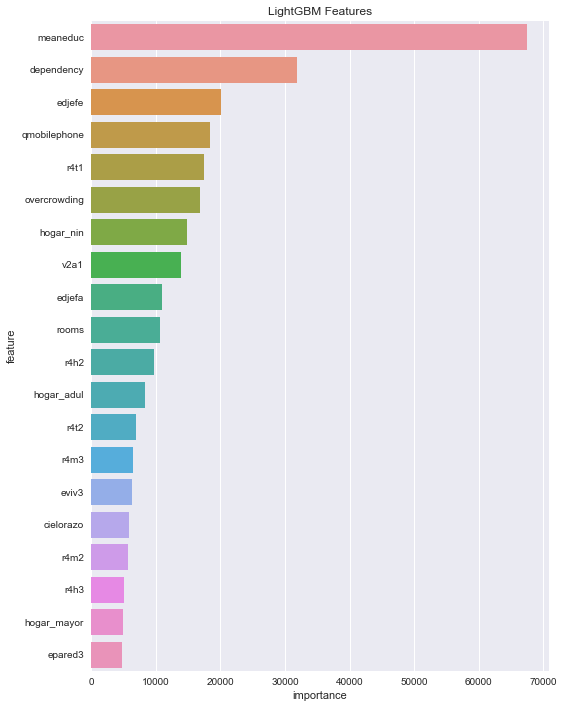

In [62]:
def display_importances(feature_importance_df_, doWorst=False, n_feat=50):
    # Plot feature importances
    if not doWorst:
        cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(
            by="importance", ascending=False)[:n_feat].index        
    else:
        cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(
            by="importance", ascending=False)[-n_feat:].index
    
    mean_imp = feature_importance_df_[["feature", "importance"]].groupby("feature").mean()
    df_2_neglect = mean_imp[mean_imp['importance'] < 1e-3]
    print('The list of features with 0 importance: ')
    print(df_2_neglect.index.values.tolist())
    del mean_imp, df_2_neglect
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    
    plt.figure(figsize=(8,10))
    sns.barplot(x="importance", y="feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features')
    plt.tight_layout()
    #plt.savefig('lgbm_importances.png')
    
importance_df = pd.DataFrame()
importance_df["feature"] = X.columns.tolist()      
importance_df["importance"] = lg.booster_.feature_importance('gain')
display_importances(feature_importance_df_=importance_df, n_feat=20)

## Submission

In [63]:
pred = lg.predict(test_X)

In [65]:
pred

array([4, 4, 4, ..., 2, 2, 2], dtype=int64)

## Conclusion

This Kernal which shows that all EDA work on all the features through which we can find the proverty level and bulid the model and compared. Here is the result and sugguest which model is performing well and final given the plot important features.


To Improve the Accuracy score, we need to do the some features engineering and also need to model tuning and hypermeter methods will do be updated soon.